In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Filling the NaN values with 0 since the dataset does not distinguish between 0 and missing.

In [9]:
train = pd.read_csv('./input/train_1.csv').fillna(0)
train.head(10)

Page  2015-07-01  2015-07-02   
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0  \
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   
5            5566_zh.wikipedia.org_all-access_spider        12.0         7.0   
6          91Days_zh.wikipedia.org_all-access_spider         0.0         0.0   
7           A'N'D_zh.wikipedia.org_all-access_spider       118.0        26.0   
8           AKB48_zh.wikipedia.org_all-access_spider         5.0        23.0   
9           ASCII_zh.wikipedia.org_all-access_spider         6.0         3.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08   
0         5.0        13.0        14.0         9.0         9.0        22.0  \
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   
5         4.0         5.0        20.0         8.0         5.0        17.0   
6         0.0         0.0         0.0         0.0         0.0         0.0   
7        30.0        24.0        29.0       127.0        53.0        37.0   
8        14.0        12.0         9.0         9.0        35.0        15.0   
9         5.0        12.0         6.0         5.0         4.0        13.0   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25   
0        26.0  ...        32.0        63.0        15.0        26.0  \
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         0.0  ...        48.0         9.0        25.0        13.0   
5        24.0  ...        16.0        27.0         8.0        17.0   
6         0.0  ...         2.0         7.0        33.0         8.0   
7        20.0  ...        64.0        35.0        35.0        28.0   
8        14.0  ...        34.0       105.0        72.0        36.0   
9         9.0  ...        25.0        17.0        22.0        29.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  
5        32.0        19.0        23.0        17.0        17.0        50.0  
6        11.0         4.0        15.0         6.0         8.0         6.0  
7        20.0        23.0        32.0        39.0        32.0        17.0  
8        33.0        30.0        36.0        38.0        31.0        97.0  
9        30.0        29.0        35.0        44.0        26.0        41.0  

[10 rows x 551 columns]

## Impact on traffic by language

Only focussing on wikipedia pages.Others are wikimedia pages

In [10]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

#eg. any string with given pattern as substring
#res = <re.Match object; span=(0, 16), match='en.wikipedia.org'>
#res[0] = en.wikipedia.org

train['lang'] = train.Page.map(get_language)
#in train df add a column lang , In train in column "Page" to each element apply function get_language 
#and store in lang column

from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [5]:
lang = {'english': 24108, 'japanese': 20431, 'german': 18547, 'wikimedia': 17855, 'french': 17802, 'chinese': 17229, 'russian': 15022, 'spanish': 14069}

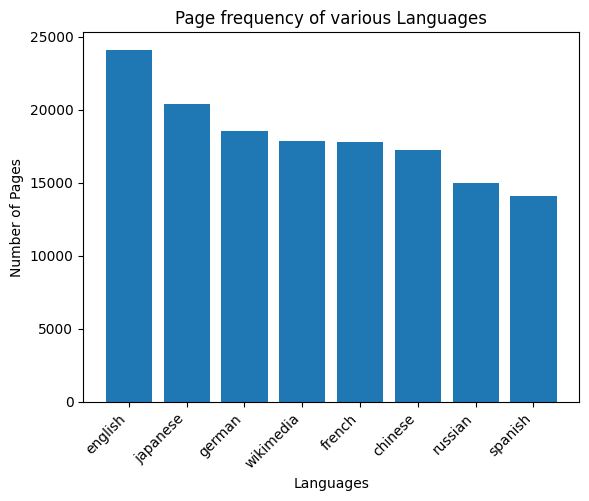

In [7]:
plt.bar(lang.keys(),lang.values())
plt.xlabel('Languages')
plt.ylabel('Number of Pages')
plt.title('Page frequency of various Languages')
plt.xticks(rotation=45, ha='right')
plt.show()

Splitting different languages into separate dataframes. lang_sets dictionary will store different dataframes with the language name being the key

In [11]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums is a dictionary which stores daily average traffic i.e total traffic/ total number of pages for each day laguage wise.

In [12]:
sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [7]:
sums['en']

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Length: 550, dtype: float64

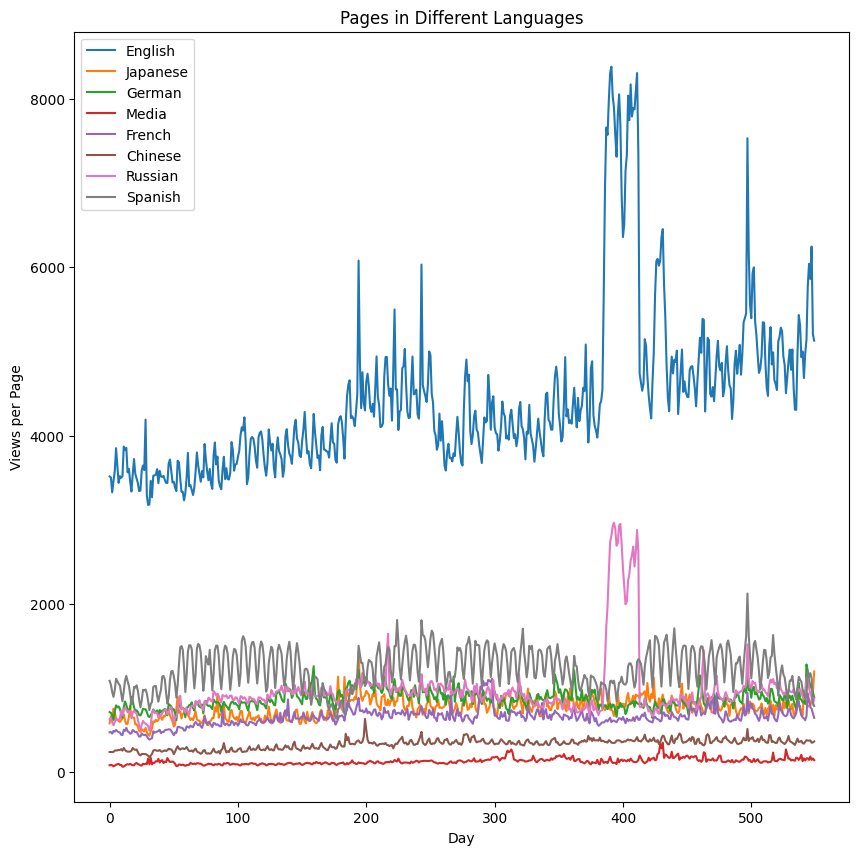

In [8]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

As expected traffic on the english page is 4-5x higher than the other languages. Spanish has the second highest traffic on a time averaged basis followed closely by russian. 

Both the Russian and english sites show large spikes around day 400 i.e August 2016 (Start of Olympics)

Spanish trendline shows a dip almost every 6 months

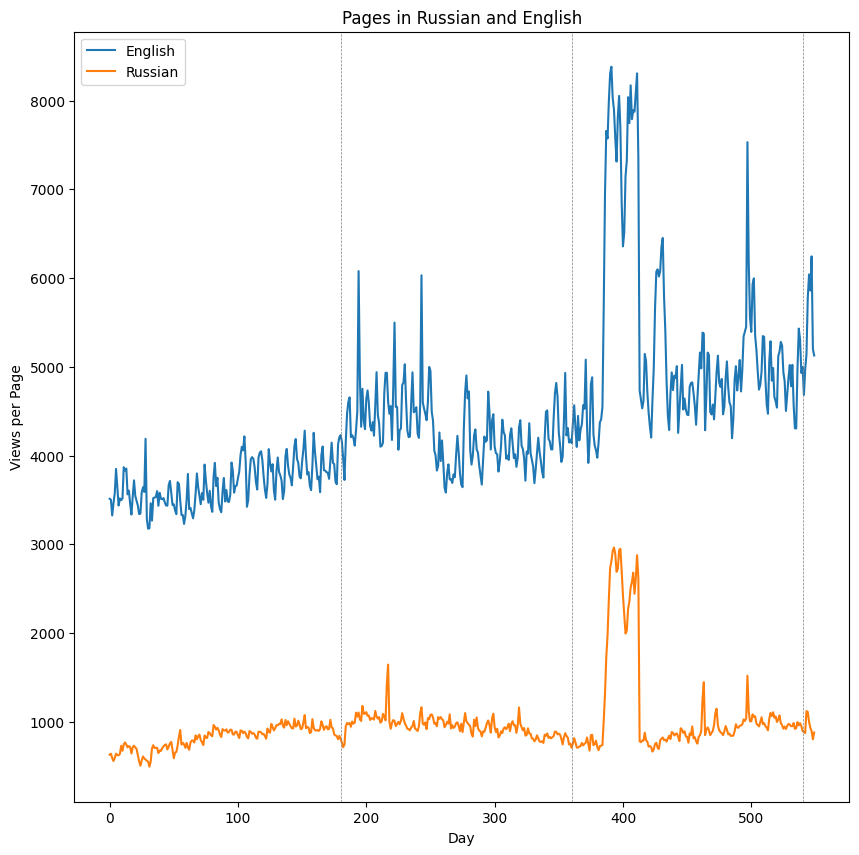

In [15]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Russian and English')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }
p = ['en','ru']
for key in p:
    plt.plot(days,sums[key],label = labels[key] )

for i in range(180, max(days), 180):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
    
plt.legend()
plt.show()

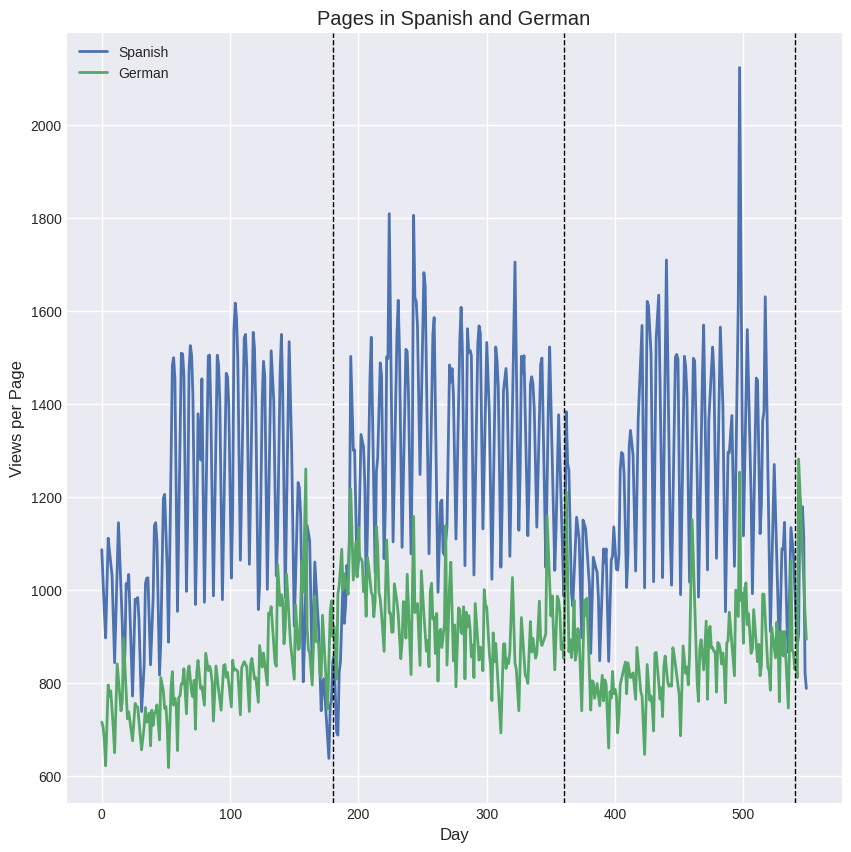

In [34]:
days = [r for r in range(sums['en'].shape[0])]
plt.style.use('seaborn-v0_8-deep')
fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Spanish and German')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }
p = ['es','de']
for key in p:
    plt.plot(days,sums[key],label = labels[key] )

for i in range(180, max(days), 180):
    plt.axvline(x=i, color='black', linestyle='--', linewidth=1.0)
    
plt.legend()
plt.show()

German and spanish show very strong cyclic behaviour with a time period of 180 days(dotted line) so a statistical model would suffice for this.

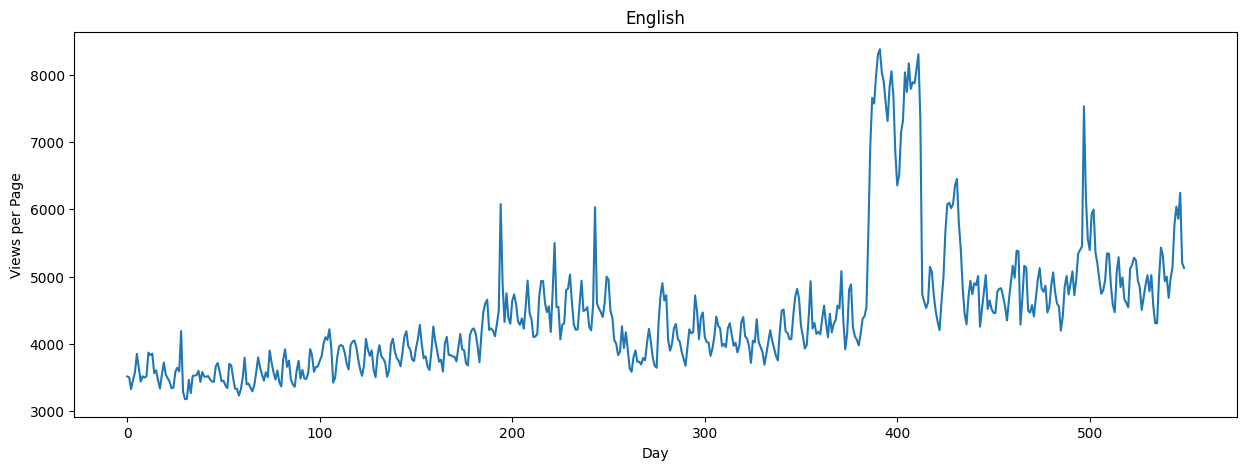

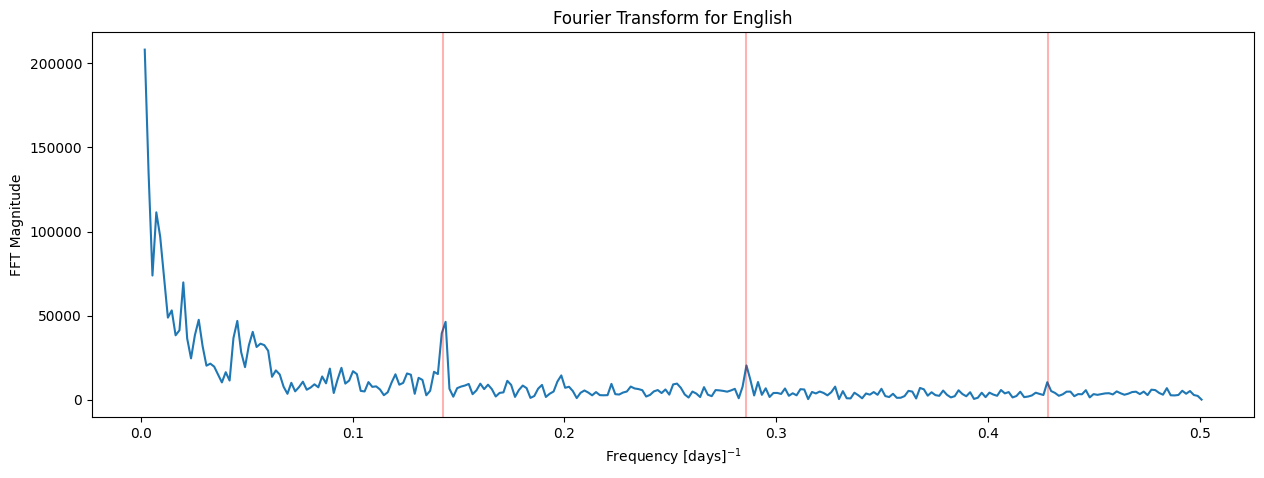

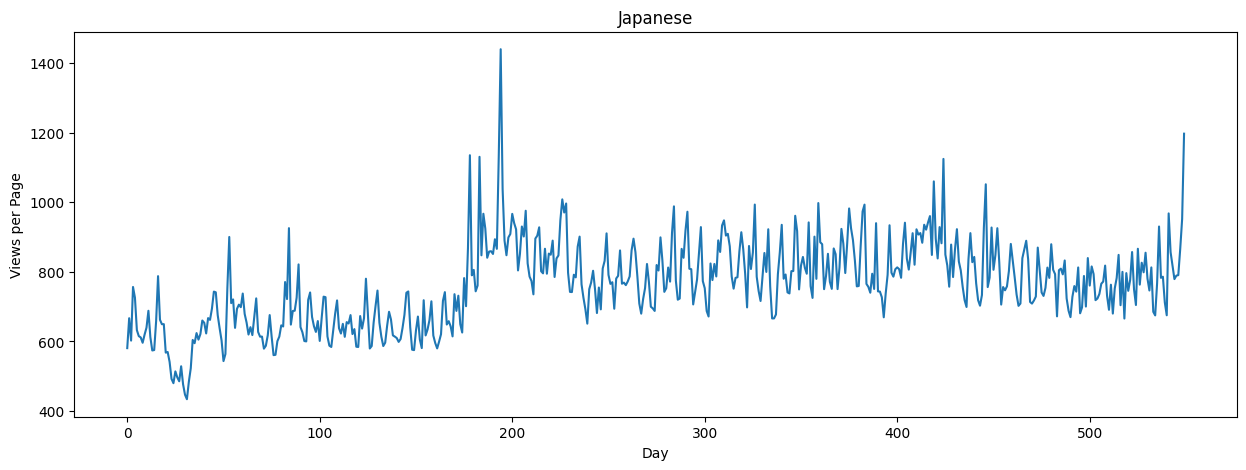

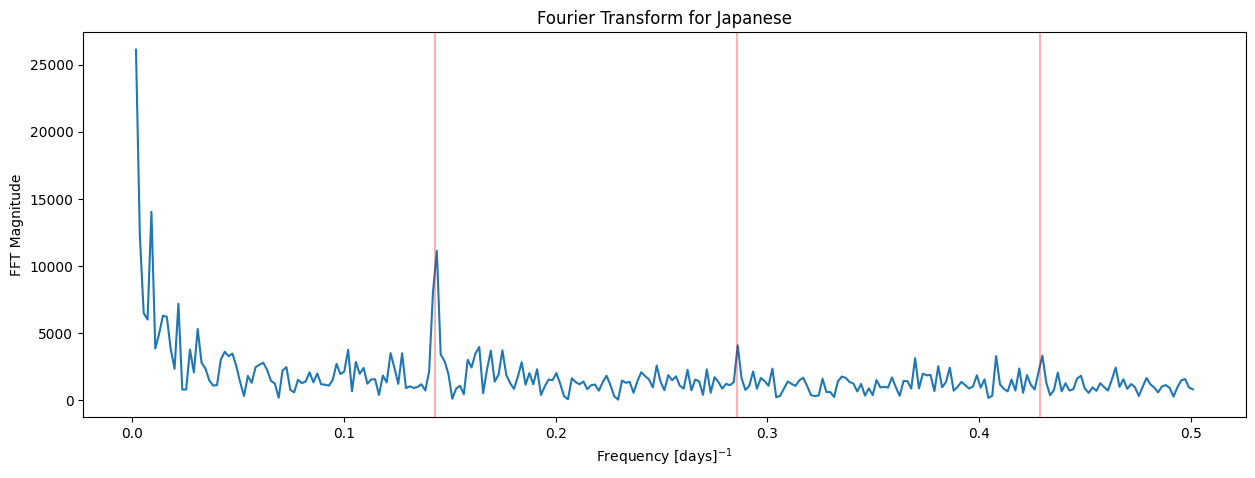

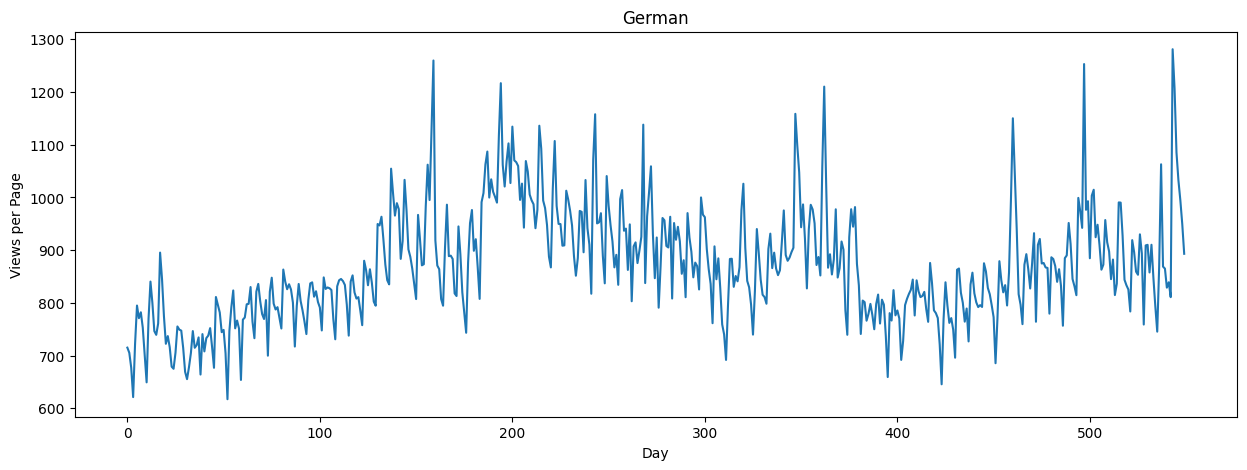

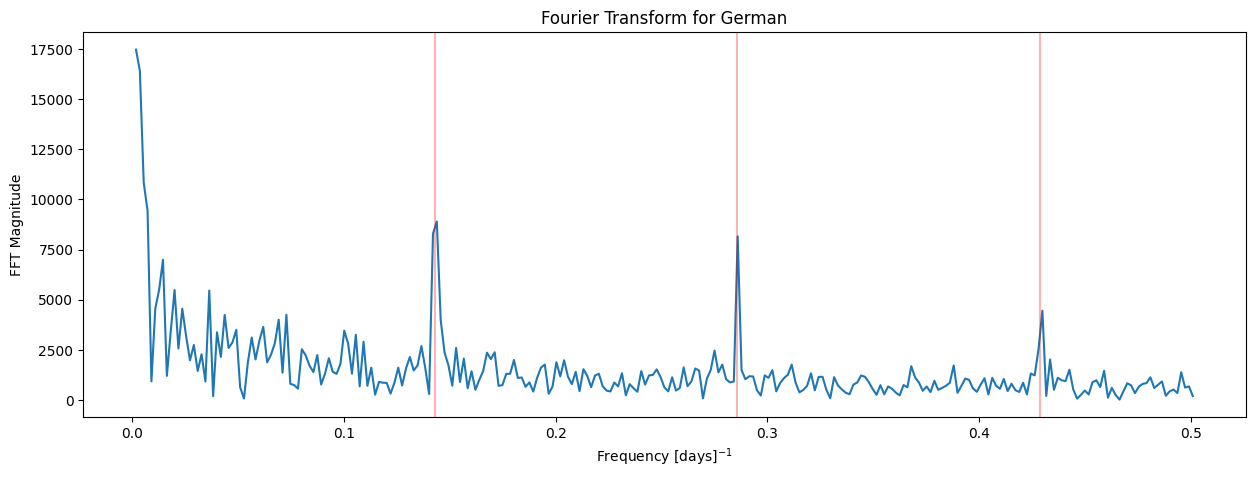

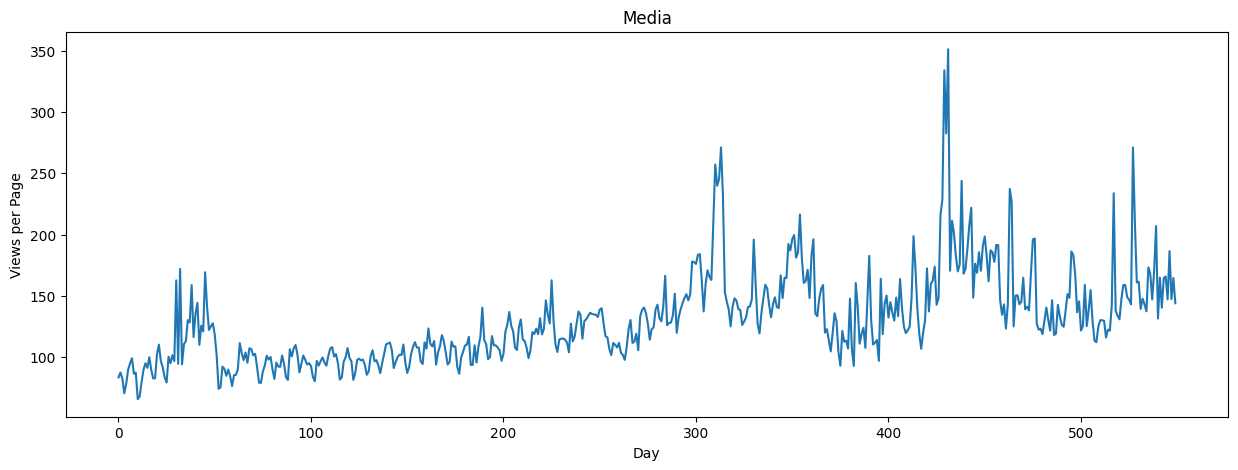

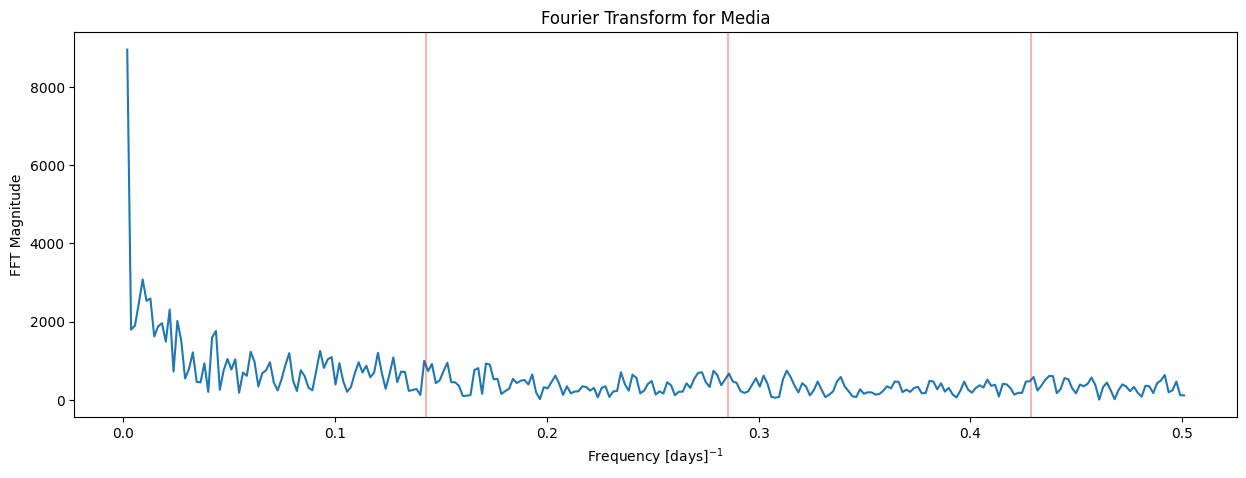

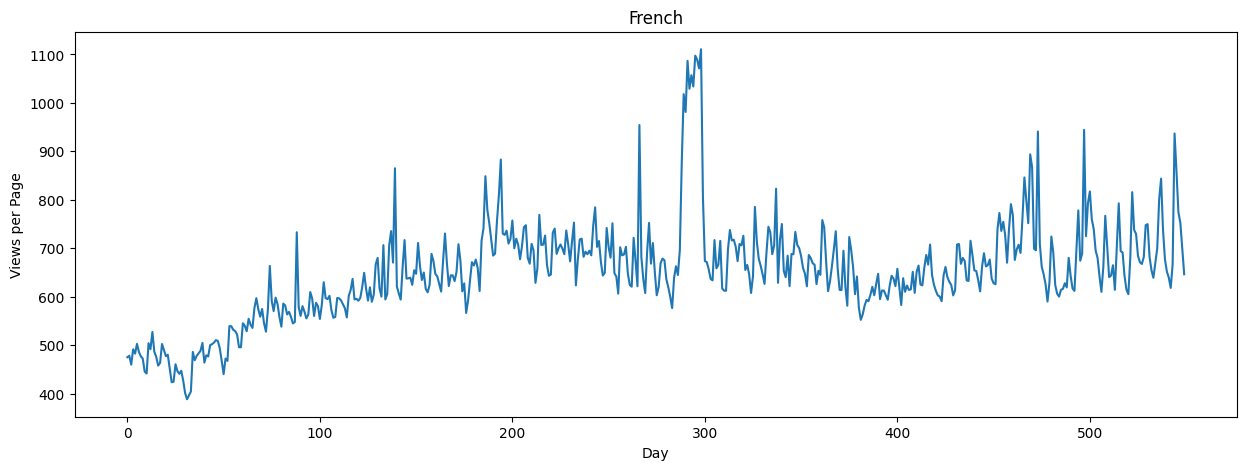

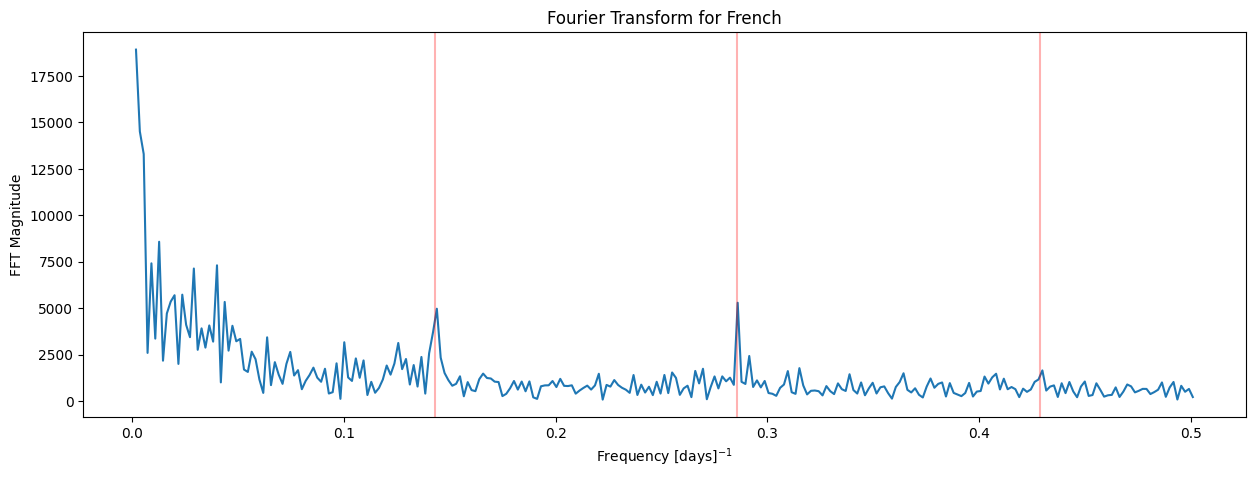

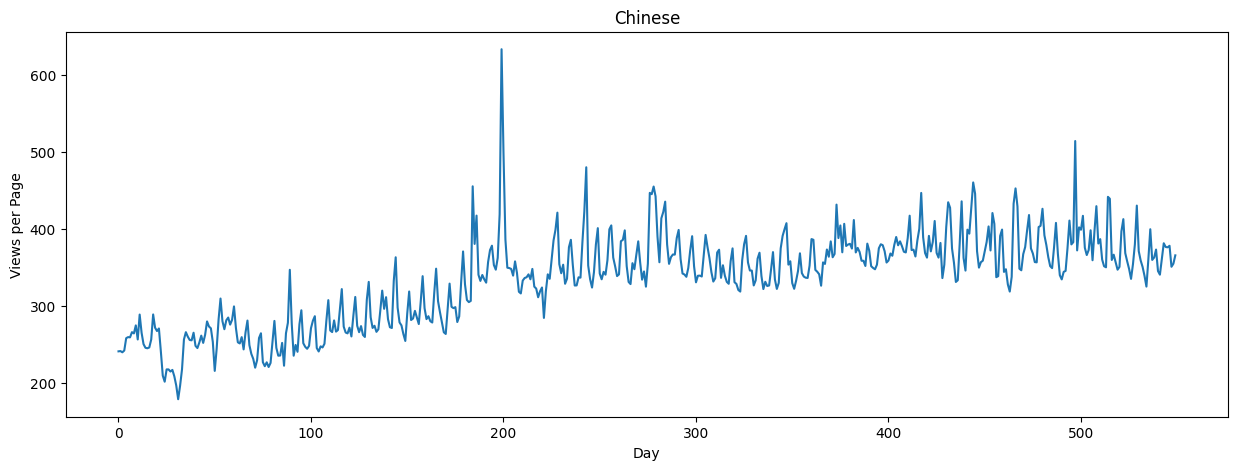

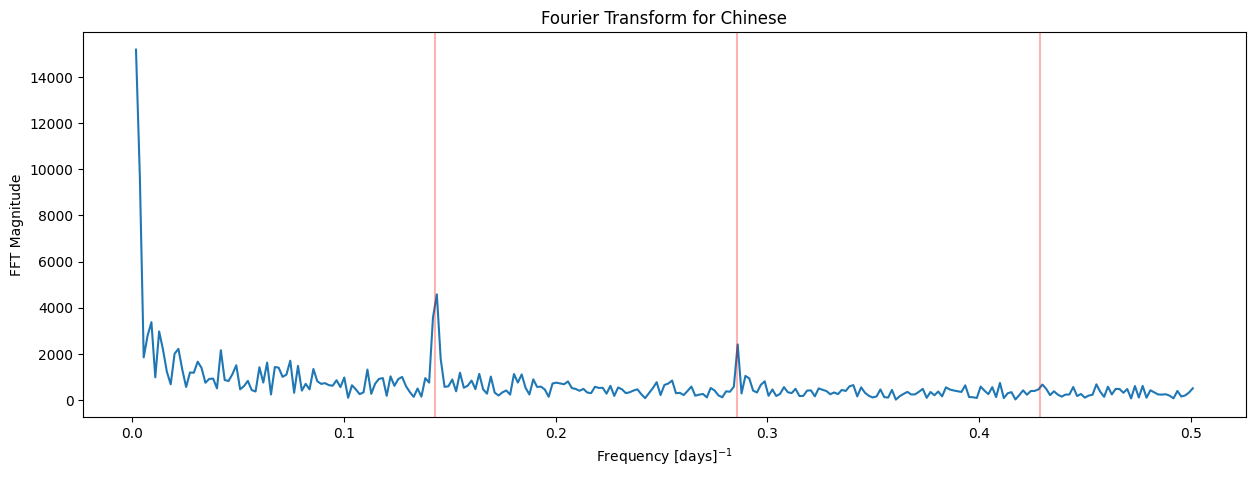

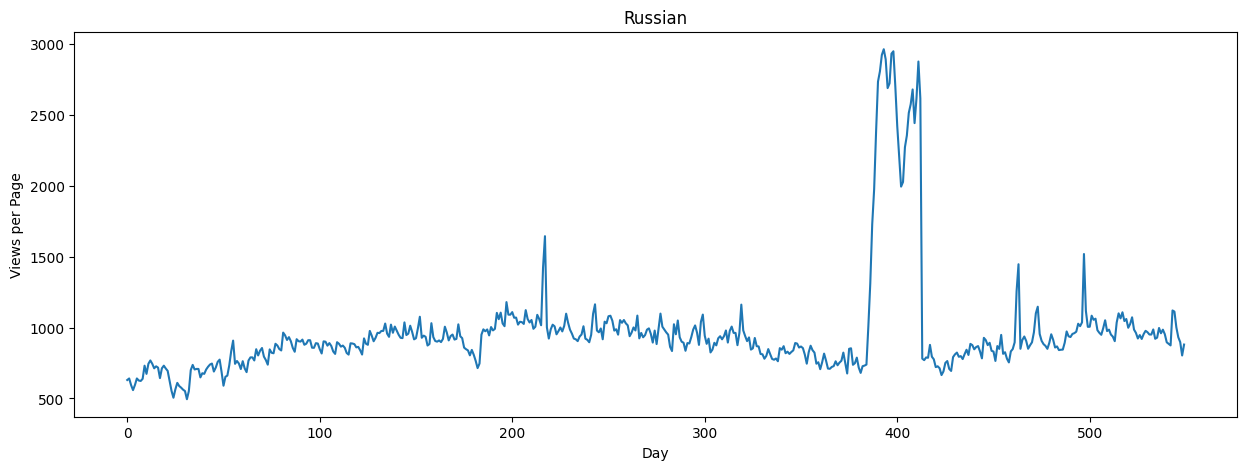

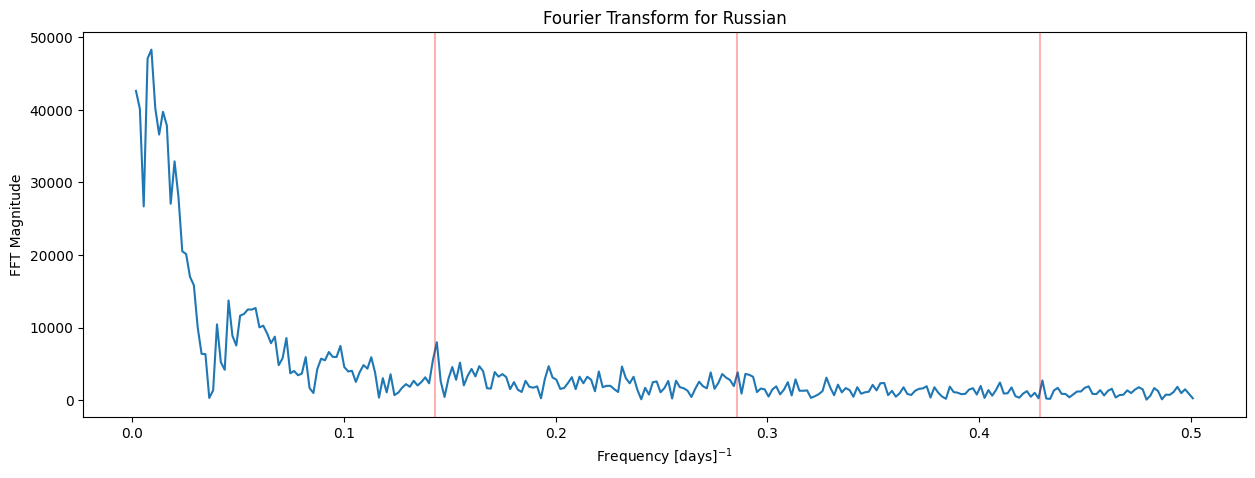

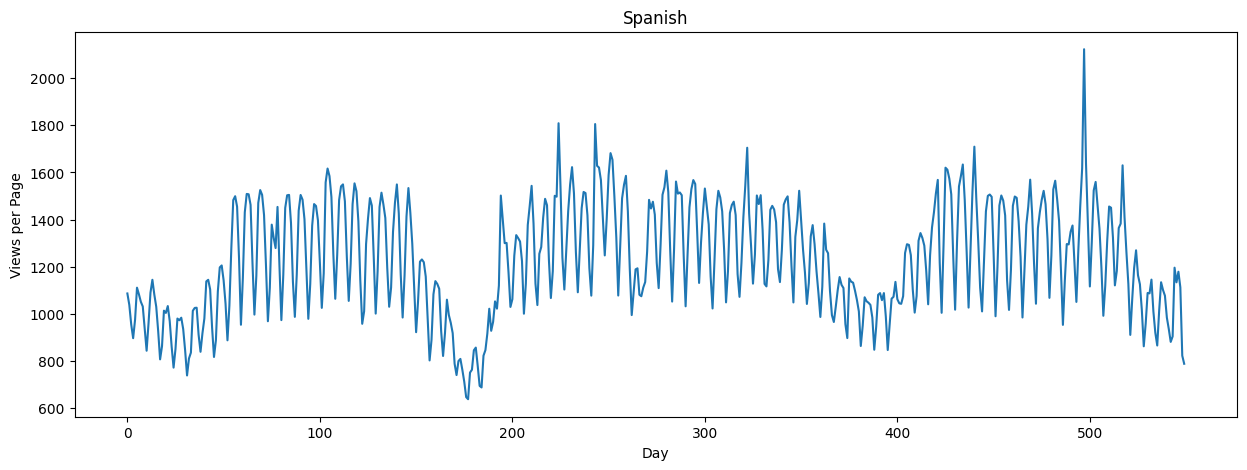

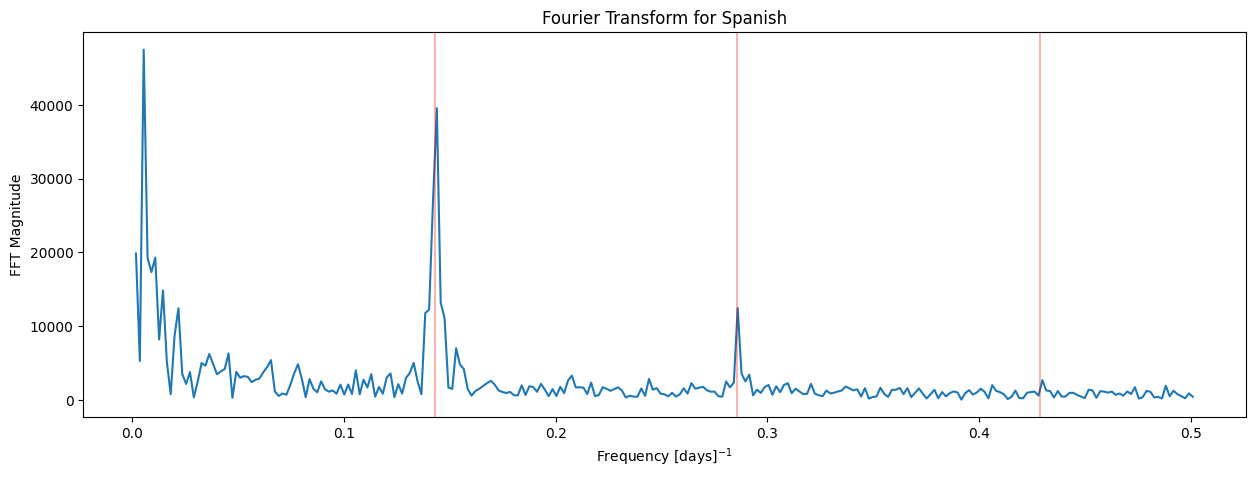

In [11]:
from scipy.fftpack import fft

def plot_with_fft(key):
    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    #plotting individually for each language
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(np.array(sums[key]))
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    t = 'Fourier Transform for ' + labels[key]
    plt.title(t)
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key])
    #Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)

Selecting the top pages by views for further individual analysis. The low-view pages are very dependent on external event (sudden spike and then 0 views after a few days) so we are focussing on the high view pages.

In [36]:
# For each language get highest few pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].iloc[:,1:].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja
                                                     Page        total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415

## Plotting the top pages(by view)

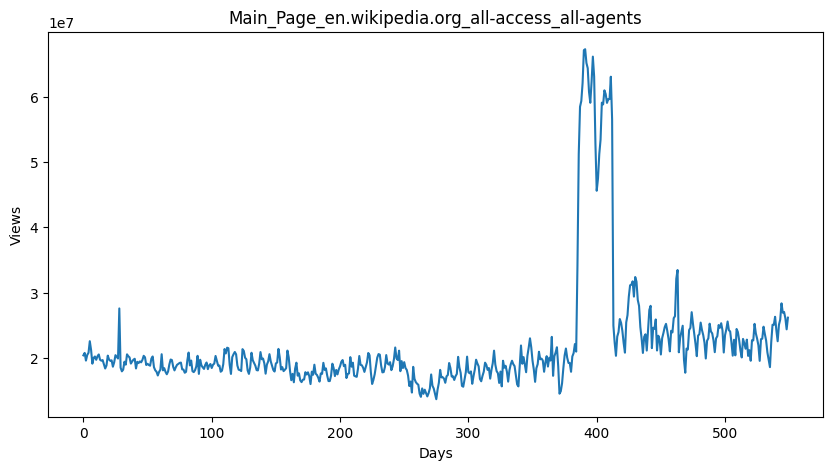

/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

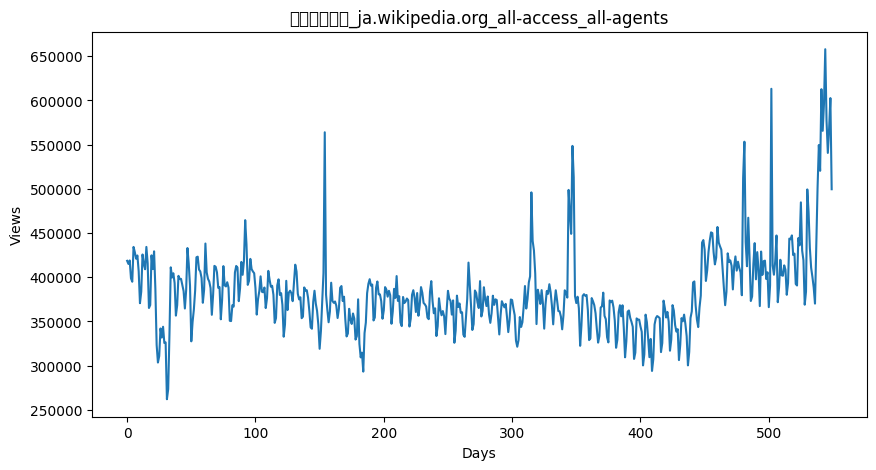

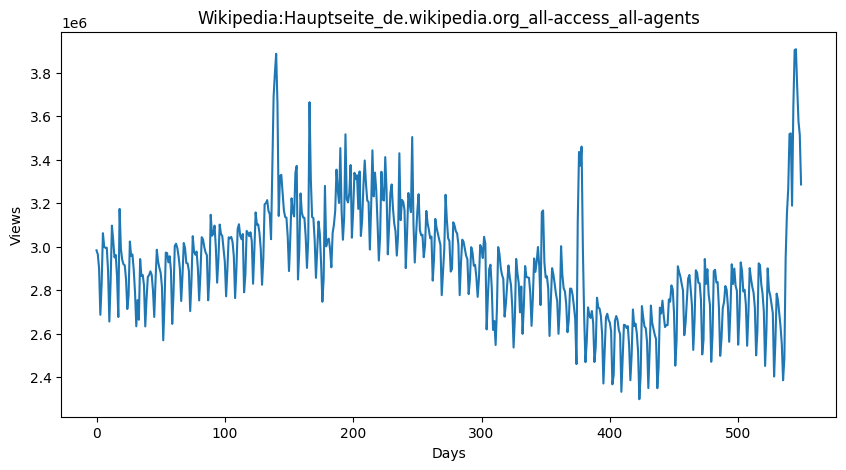

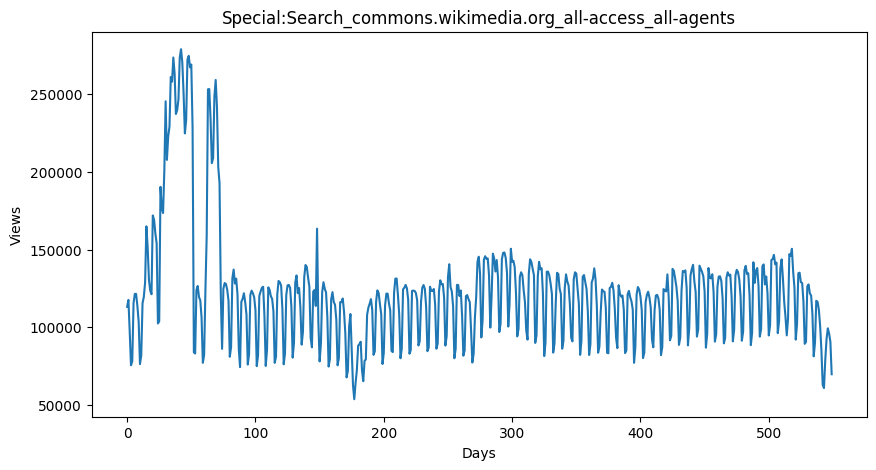

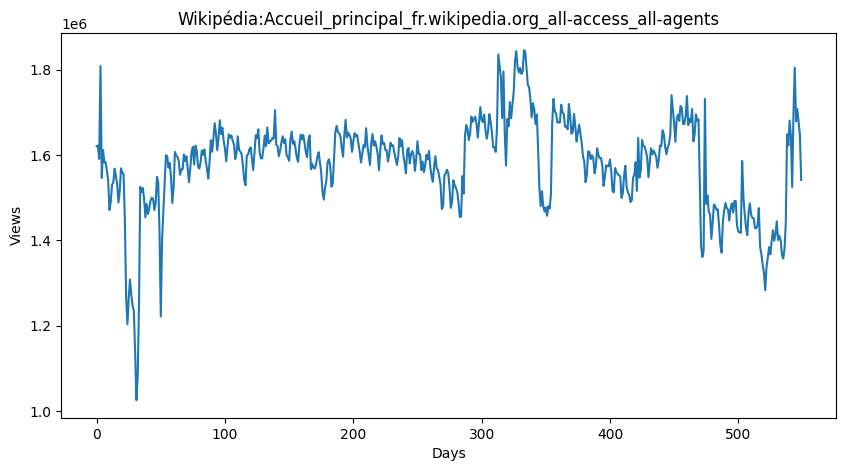

/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


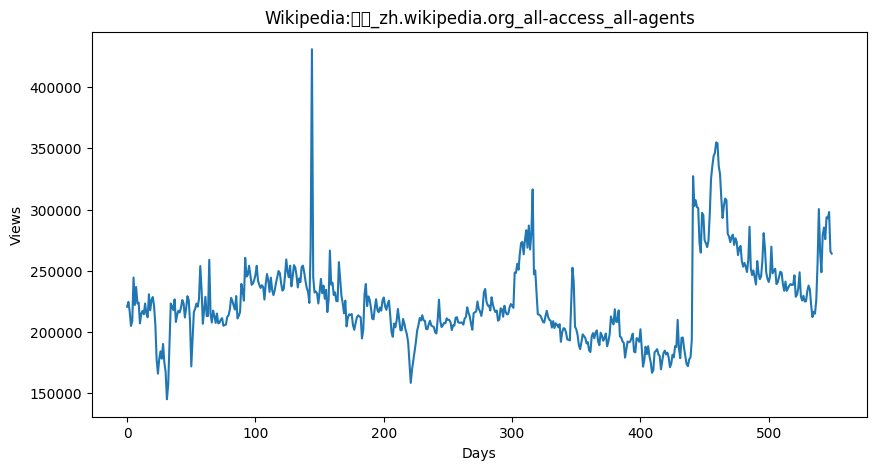

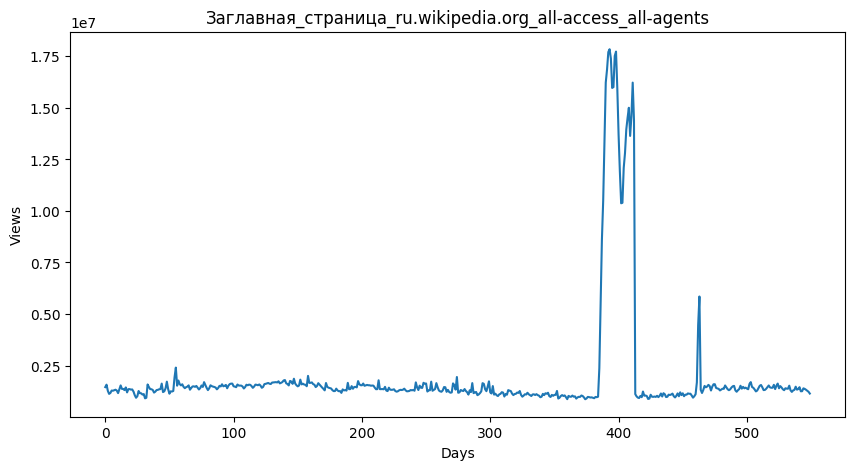

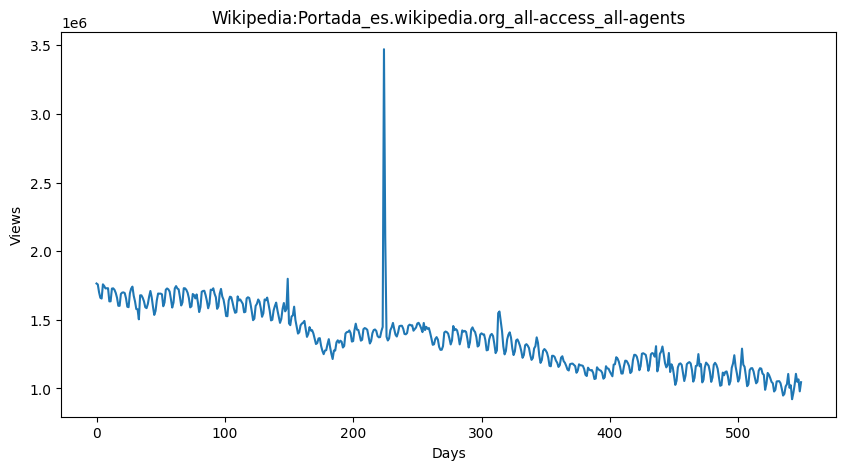

In [13]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()

Before applying statistical techniques checking for autocorrelation

#### Identifying the value of differencing through visual inspection and by calculating the p-value

Text(0.5, 1.0, 'Original series')

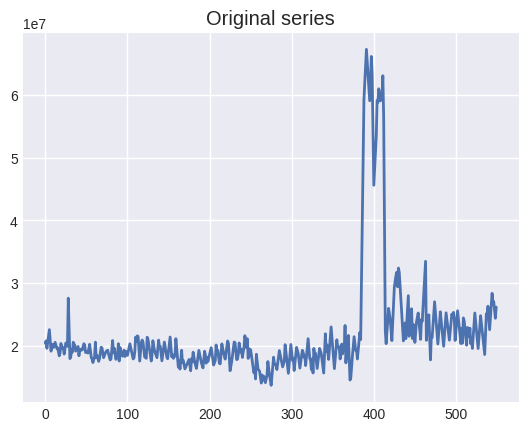

In [40]:
from statsmodels.tsa.stattools import adfuller

cols = train.columns[1:-1]
data = np.array(train.loc[top_pages['en'],cols])
plt.plot(data)
p_value = adfuller(data)
plt.title('Original series')
#print("\n",p_value[1])

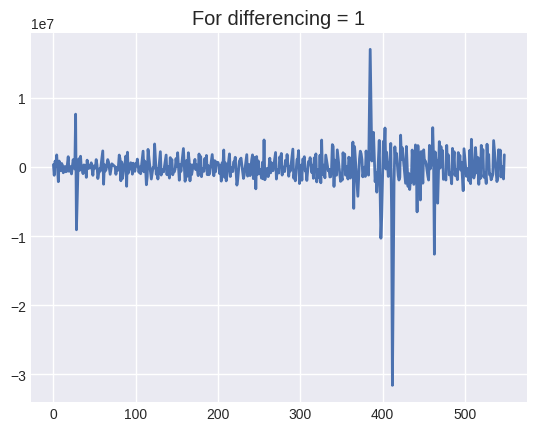

In [38]:
data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
plt.title('For differencing = 1')
plt.plot(data_diff)

In [39]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(data_diff)
print("\n",p_value[1])


 5.481911439181588e-09


At 1 differencing we see p value less than 0.05 i.e stationary data

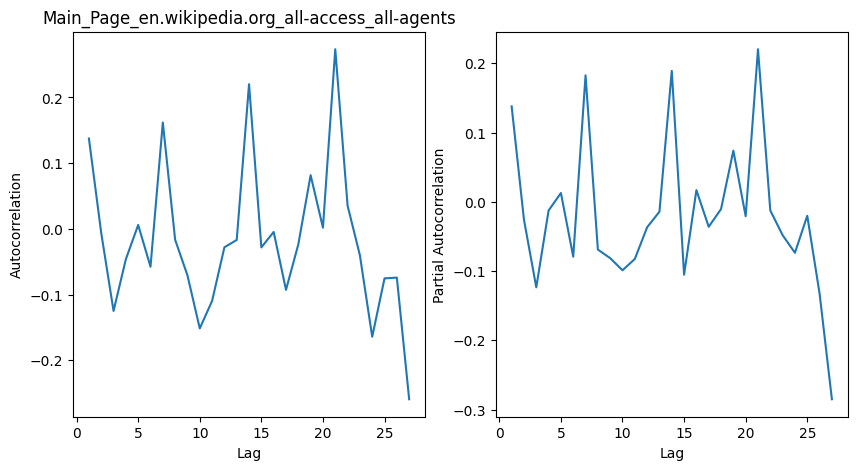

/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

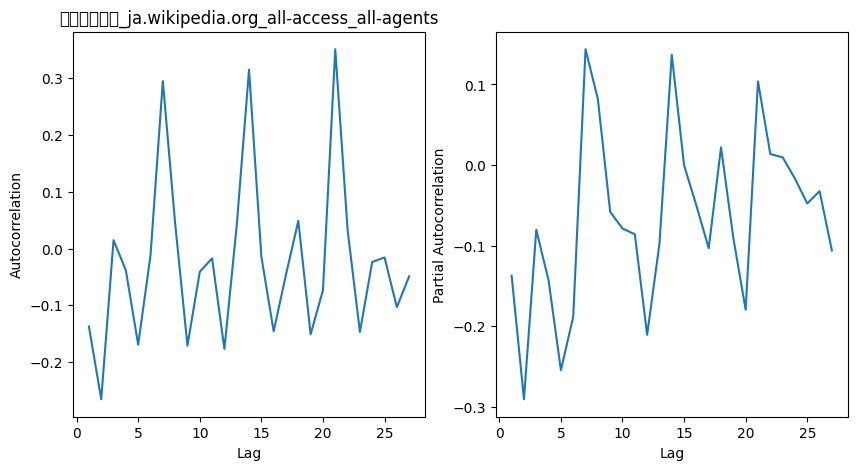

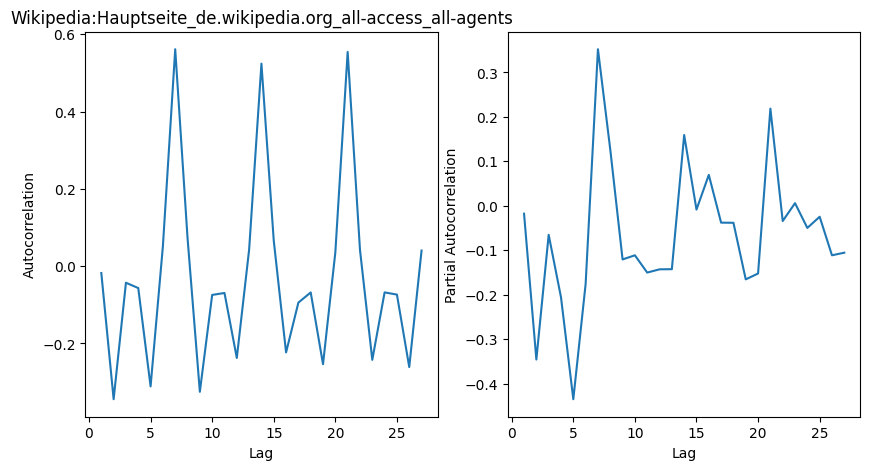

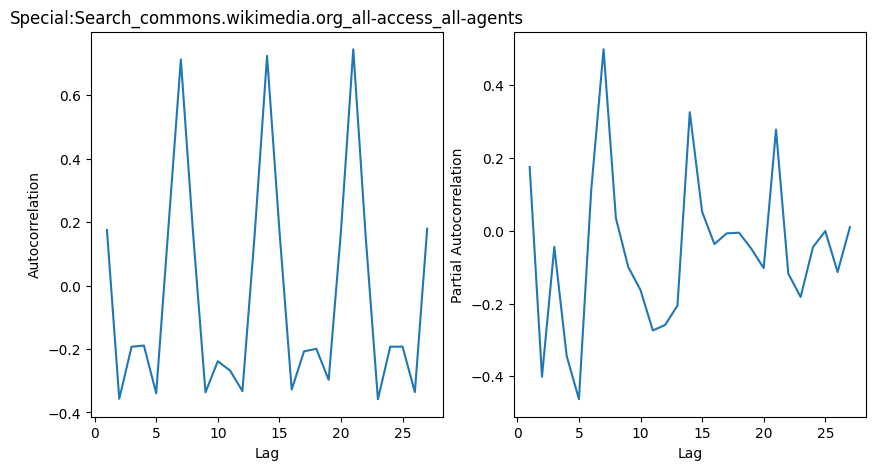

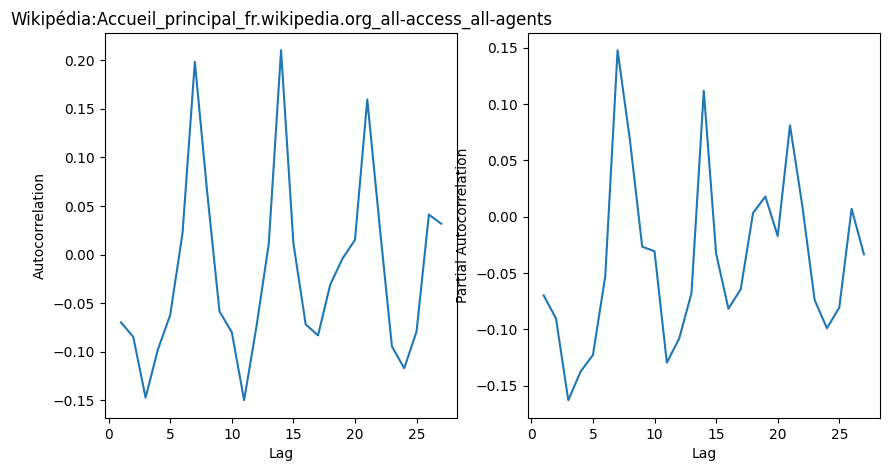

/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sid/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


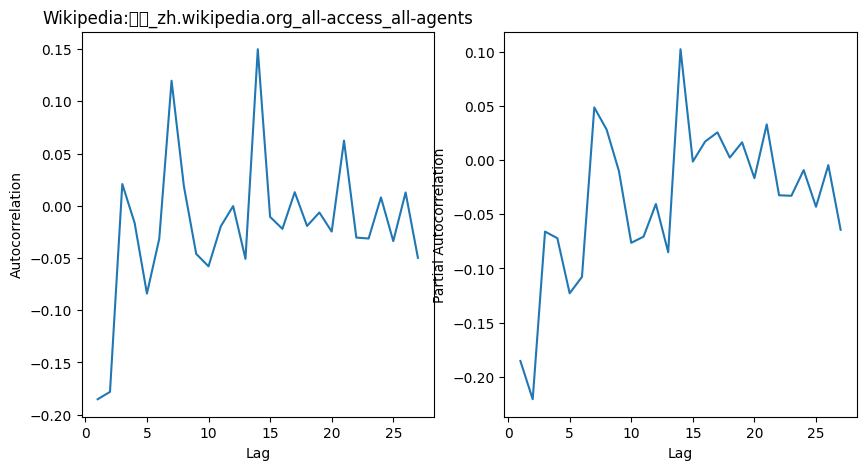

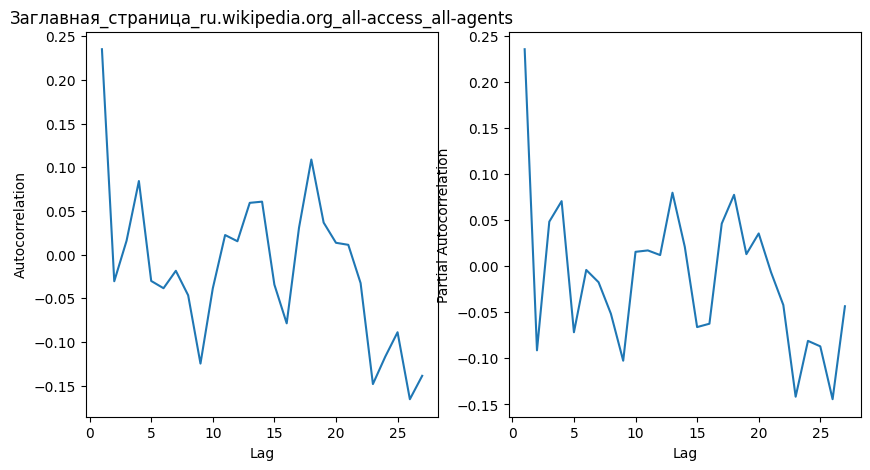

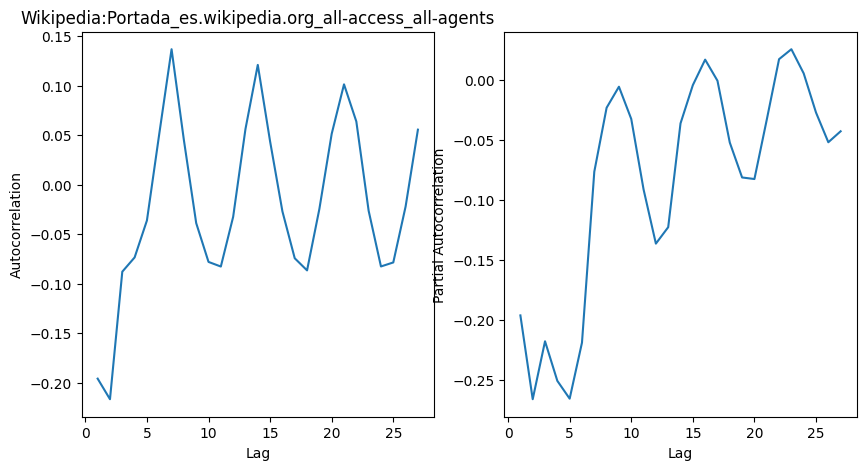

In [38]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in top_pages:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train.columns[1:-1]
    data = np.array(train.loc[top_pages[key],cols])
    data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(train.loc[top_pages[key],'Page'])

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    plt.show()

We see weekly spikes(lag = 7*n) in PACF and Autocorrelation plots except for russian pages.
We don't see clear peaks and dips so guess the value of lag order and order of moving average.

## Making baseline predictions using ARIMA

### Performing grid search for p and q values. Using AIC and BIC as objective function(i.e measure of fit)

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic=[]


for p in range(7):
    for q in range(7):
        model = SARIMAX(data, order=(p,1,q)) #because adf test showed that d=1
        results = model.fit()
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61195D+01    |proj g|=  7.10537D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.105D-10   1.612D+01
  F =   16.119512487197941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.61023D+01    |proj g|=  1.79291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5      7      1     0     0   1.793D-05   1.610D+01
  F =   16.102304997258823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60965D+01    |proj g|=  2.33265D-02

At iterate    5    f=  1.60959D+01    |proj g|=  2.04270D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.61085D+01    |proj g|=  9.50055D-03

At iterate   15    f=  1.61050D+01    |proj g|=  7.68702D-03

At iterate   20    f=  1.61022D+01    |proj g|=  4.45372D-03

At iterate   25    f=  1.61020D+01    |proj g|=  6.14975D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     29      1     0     0   6.150D-07   1.610D+01
  F =   16.102038207370587     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.61016D+01    |proj g|=  8.61167D-03

At iterate   10    f=  1.60986D+01    |proj g|=  3.98305D-03

At iterate   15    f=  1.60985D+01    |proj g|=  1.10301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   1.103D-05   1.610D+01
  F =   16.098521093577212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61030D+01    |proj g|=  1.29653D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  1.60992D+01    |proj g|=  4.18776D-02

At iterate   15    f=  1.60965D+01    |proj g|=  3.43630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     27      1     0     0   7.758D-06   1.610D+01
  F =   16.096516269557373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60984D+01    |proj g|=  2.19902D-02

At iterate    5    f=  1.60969D+01    |proj g|=  2.53888D-02


 This problem is unconstrained.



At iterate   10    f=  1.60936D+01    |proj g|=  9.81259D-03

At iterate   15    f=  1.60934D+01    |proj g|=  8.38249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     19      1     0     0   1.393D-05   1.609D+01
  F =   16.093447756043698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61104D+01    |proj g|=  1.43926D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
/home/sid/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sid/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.61018D+01    |proj g|=  4.84772D-03

At iterate   25    f=  1.61015D+01    |proj g|=  3.53737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   3.226D-07   1.610D+01
  F =   16.101450611572510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61084D+01    |proj g|=  4.30791D-02

At iterate    5    f=  1.61078D+01    |proj g|=  2.46734D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.61056D+01    |proj g|=  6.38864D-03

At iterate   20    f=  1.61018D+01    |proj g|=  8.35813D-03

At iterate   25    f=  1.61015D+01    |proj g|=  1.62337D-03

At iterate   30    f=  1.61014D+01    |proj g|=  7.25203D-03

At iterate   35    f=  1.61014D+01    |proj g|=  1.19073D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     42      1     0     0   6.083D-06   1.610D+01
  F =   16.101354642737828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.61005D+01    |proj g|=  2.50328D-02

At iterate   10    f=  1.60953D+01    |proj g|=  5.75745D-03

At iterate   15    f=  1.60945D+01    |proj g|=  1.96463D-02

At iterate   20    f=  1.60940D+01    |proj g|=  2.19887D-04

At iterate   25    f=  1.60940D+01    |proj g|=  1.29631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     28      1     0     0   3.746D-05   1.609D+01
  F =   16.093990007622772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61025D+01    |proj g|=  2.56519D-02

At iterate    5    f=  1.61015D+01    |proj g|=  1.50964D-02

At iterate   10    f=  1.60987D+01    |proj g|=  5.03288D-03

At iterate   15    f=  1.60987D+01    |proj g|=  4.08631D-04

At iterate   20    f=  1.60986D+01    |proj g|=  1.61818D-02

At iterate   25    f=  1.60973D+01    |proj g|=  1.09954D-02

At iterate   30    f=  1.60945D+01    |proj g|=  6.54509D-03

At iterate   35    f=  1.60933D+01    |proj g|=  2.56406D-02

At iterate   40    f=  1.60792D+01    |proj g|=  4.05598D-02

At iterate   45    f=  1.60652D+01    |proj g|=  1.97009D-02


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60583D+01    |proj g|=  9.25603D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     71      1     0     0   9.256D-02   1.606D+01
  F =   16.058265418139847     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60984D+01    |proj g|=  2.18460D-02

At iterate    5    f=  1.60970D+01    |proj g|=  2.39205D-02

At iterate   10    f=  1.60948D+01    |proj g|=  1.57054D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61045D+01    |proj g|=  2.03069D-02

At iterate    5    f=  1.61042D+01    |proj g|=  8.34168D-04

At iterate   10    f=  1.61041D+01    |proj g|=  3.50455D-04

At iterate   15    f=  1.61041D+01    |proj g|=  2.08716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   5.734D-06   1.610D+01
  F =   16.104130741032574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  1.60984D+01    |proj g|=  6.27999D-03

At iterate   15    f=  1.60975D+01    |proj g|=  3.04705D-03

At iterate   20    f=  1.60970D+01    |proj g|=  2.66397D-02

At iterate   25    f=  1.60952D+01    |proj g|=  4.15378D-02

At iterate   30    f=  1.60935D+01    |proj g|=  5.50307D-02

At iterate   35    f=  1.60919D+01    |proj g|=  1.85071D-02

At iterate   40    f=  1.60912D+01    |proj g|=  3.42068D-03

At iterate   45    f=  1.60911D+01    |proj g|=  1.37177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     60      1     0     0   3.322D-05   1.609D+01
  F =   16.0911375432

 This problem is unconstrained.



At iterate   10    f=  1.60972D+01    |proj g|=  7.92985D-03

At iterate   15    f=  1.60931D+01    |proj g|=  6.74807D-02

At iterate   20    f=  1.60801D+01    |proj g|=  5.33513D-02

At iterate   25    f=  1.60576D+01    |proj g|=  6.41677D-02

At iterate   30    f=  1.60543D+01    |proj g|=  5.33686D-03

At iterate   35    f=  1.60529D+01    |proj g|=  9.06400D-02

At iterate   40    f=  1.60494D+01    |proj g|=  5.13406D-02

At iterate   45    f=  1.60481D+01    |proj g|=  4.71252D-02


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60478D+01    |proj g|=  7.40902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   7.409D-03   1.605D+01
  F =   16.047758225808810     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61041D+01    |proj g|=  3.75867D-02

At iterate    5    f=  1.61022D+01    |proj g|=  1.56955D-02

At iterate   10    f=  1.60979D+01    |proj g|=  2.02363D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.60926D+01    |proj g|=  3.33946D-02

At iterate   15    f=  1.60913D+01    |proj g|=  4.51670D-03

At iterate   20    f=  1.60907D+01    |proj g|=  3.92066D-02

At iterate   25    f=  1.60902D+01    |proj g|=  5.12799D-03

At iterate   30    f=  1.60901D+01    |proj g|=  1.60002D-03

At iterate   35    f=  1.60901D+01    |proj g|=  7.73218D-03

At iterate   40    f=  1.60901D+01    |proj g|=  5.71739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     49      1     0     0   1.899D-04   1.609D+01
  F =   16.090073958403902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.61001D+01    |proj g|=  3.24007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     28      1     0     0   6.312D-06   1.610D+01
  F =   16.100044930524213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61197D+01    |proj g|=  1.43810D-01

At iterate    5    f=  1.61041D+01    |proj g|=  9.18870D-04

At iterate   10    f=  1.61041D+01    |proj g|=  1.23081D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  1.60946D+01    |proj g|=  5.89138D-02

At iterate   25    f=  1.60730D+01    |proj g|=  5.58973D-02

At iterate   30    f=  1.60577D+01    |proj g|=  4.16701D-02

At iterate   35    f=  1.60520D+01    |proj g|=  4.64842D-03

At iterate   40    f=  1.60520D+01    |proj g|=  1.36942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     59      1     0     0   1.369D-04   1.605D+01
  F =   16.051982826905341     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.60935D+01    |proj g|=  1.77981D-02

At iterate   25    f=  1.60914D+01    |proj g|=  1.08005D-02

At iterate   30    f=  1.60900D+01    |proj g|=  9.89978D-02

At iterate   35    f=  1.60882D+01    |proj g|=  3.67586D-02

At iterate   40    f=  1.60872D+01    |proj g|=  1.04240D-01

At iterate   45    f=  1.60868D+01    |proj g|=  4.82112D-02

At iterate   50    f=  1.60867D+01    |proj g|=  5.79118D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   5.791D-03   1.609D+01
  F =   16.086664637201036     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.60990D+01    |proj g|=  6.05257D-03

At iterate   15    f=  1.60967D+01    |proj g|=  4.72742D-02

At iterate   20    f=  1.60893D+01    |proj g|=  8.64602D-02

At iterate   25    f=  1.60794D+01    |proj g|=  8.05424D-02

At iterate   30    f=  1.60668D+01    |proj g|=  1.58950D-01

At iterate   35    f=  1.60598D+01    |proj g|=  2.93947D-01

At iterate   40    f=  1.60585D+01    |proj g|=  4.52752D-02

At iterate   45    f=  1.60583D+01    |proj g|=  5.24833D-03

At iterate   50    f=  1.60579D+01    |proj g|=  2.09344D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69   

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.60866D+01    |proj g|=  3.75653D-02

At iterate   15    f=  1.60775D+01    |proj g|=  3.07609D-02

At iterate   20    f=  1.60758D+01    |proj g|=  2.60781D-02

At iterate   25    f=  1.60649D+01    |proj g|=  1.74943D-01

At iterate   30    f=  1.60536D+01    |proj g|=  1.20972D-01

At iterate   35    f=  1.60469D+01    |proj g|=  6.67032D-02

At iterate   40    f=  1.60429D+01    |proj g|=  3.91399D-01

At iterate   45    f=  1.60406D+01    |proj g|=  1.31094D-01


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60357D+01    |proj g|=  3.64559D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     64      1     0     0   3.646D-01   1.604D+01
  F =   16.035674857208598     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61076D+01    |proj g|=  4.66118D-01

At iterate    5    f=  1.60850D+01    |proj g|=  4.49465D-02

At iterate   10    f=  1.60843D+01    |proj g|=  5.34913D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.60495D+01    |proj g|=  3.69979D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   3.700D-01   1.605D+01
  F =   16.049494152492969     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61042D+01    |proj g|=  2.08151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  1.60998D+01    |proj g|=  2.99592D-03

At iterate   20    f=  1.60990D+01    |proj g|=  5.30889D-02

At iterate   25    f=  1.60922D+01    |proj g|=  3.65332D-02

At iterate   30    f=  1.60792D+01    |proj g|=  1.01232D-01

At iterate   35    f=  1.60661D+01    |proj g|=  1.87995D-02

At iterate   40    f=  1.60521D+01    |proj g|=  6.17013D-02

At iterate   45    f=  1.60515D+01    |proj g|=  3.34844D-02


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60511D+01    |proj g|=  8.72814D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69      1     0     0   8.728D-03   1.605D+01
  F =   16.051106982712717     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61206D+01    |proj g|=  1.49016D-01

At iterate    5    f=  1.61032D+01    |proj g|=  1.26579D-02

At iterate   10    f=  1.60976D+01    |proj g|=  1.33353D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  1.61029D+01    |proj g|=  1.29779D-02

At iterate   10    f=  1.60922D+01    |proj g|=  3.96647D-02

At iterate   15    f=  1.60866D+01    |proj g|=  1.91585D-02

At iterate   20    f=  1.60667D+01    |proj g|=  6.10210D-02

At iterate   25    f=  1.60577D+01    |proj g|=  7.09741D-02

At iterate   30    f=  1.60545D+01    |proj g|=  1.34970D-01

At iterate   35    f=  1.60538D+01    |proj g|=  1.09943D-02

At iterate   40    f=  1.60518D+01    |proj g|=  2.78442D-01

At iterate   45    f=  1.60510D+01    |proj g|=  1.05235D-01


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60508D+01    |proj g|=  1.23515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     64      1     0     0   1.235D-02   1.605D+01
  F =   16.050762916105114     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60955D+01    |proj g|=  1.42926D-01

At iterate    5    f=  1.60866D+01    |proj g|=  1.69041D-02

At iterate   10    f=  1.60844D+01    |proj g|=  9.14690D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60650D+01    |proj g|=  7.54463D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     72      1     0     0   7.545D-02   1.607D+01
  F =   16.065043744087681     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61166D+01    |proj g|=  4.51388D-01

At iterate    5    f=  1.60829D+01    |proj g|=  1.43834D-02

At iterate   10    f=  1.60777D+01    |proj g|=  7.81709D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.60377D+01    |proj g|=  1.21376D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     70      1     0     0   1.214D-01   1.604D+01
  F =   16.037656267896018     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61009D+01    |proj g|=  2.07972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  1.60914D+01    |proj g|=  1.48762D-02

At iterate   20    f=  1.60900D+01    |proj g|=  8.47532D-03

At iterate   25    f=  1.60889D+01    |proj g|=  3.45599D-02

At iterate   30    f=  1.60757D+01    |proj g|=  9.77033D-02

At iterate   35    f=  1.60552D+01    |proj g|=  8.66316D-02

At iterate   40    f=  1.60514D+01    |proj g|=  4.27045D-03

At iterate   45    f=  1.60513D+01    |proj g|=  8.89231D-03

At iterate   50    f=  1.60512D+01    |proj g|=  1.36264D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66      1     0     0   1.363D-02   1.605D+01
  F =   16.0512112155

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.60915D+01    |proj g|=  2.12283D-02

At iterate   15    f=  1.60783D+01    |proj g|=  1.58211D-01

At iterate   20    f=  1.60474D+01    |proj g|=  8.74974D-02

At iterate   25    f=  1.60460D+01    |proj g|=  1.39625D-02

At iterate   30    f=  1.60458D+01    |proj g|=  1.17880D-02

At iterate   35    f=  1.60455D+01    |proj g|=  4.07505D-02

At iterate   40    f=  1.60449D+01    |proj g|=  1.34642D-01

At iterate   45    f=  1.60437D+01    |proj g|=  2.21785D-02


/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60433D+01    |proj g|=  2.90878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     65      1     0     0   2.909D-03   1.604D+01
  F =   16.043328424734177     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61208D+01    |proj g|=  1.49579D-01

At iterate    5    f=  1.60984D+01    |proj g|=  2.20045D-02

At iterate   10    f=  1.60877D+01    |proj g|=  2.66428D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60455D+01    |proj g|=  2.60876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     68      1     0     0   2.609D-03   1.605D+01
  F =   16.045545673046647     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61046D+01    |proj g|=  4.85375D-01

At iterate    5    f=  1.60863D+01    |proj g|=  9.59019D-02

At iterate   10    f=  1.60826D+01    |proj g|=  9.86495D-02

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.60330D+01    |proj g|=  6.11867D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     59      1     0     0   6.119D-02   1.603D+01
  F =   16.032952721699058     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60982D+01    |proj g|=  5.66862D-01

At iterate    5    f=  1.60804D+01    |proj g|=  2.40812D-01

At iterate   10    f=  1.60782D+01    |proj g|=  1.20345D-01

At iter

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
order_df['total'] = order_df['AIC']+order_df['BIC']
order_df.loc[order_df.total == min(order_df['total'])]

p  q           AIC           BIC        total
33  4  5  17659.242343  17702.323327  35361.56567

In [37]:
data.shape

(550,)

### So we use value of p as 4 and q as 5 

In [ ]:
#print(result.params)
pred = result.predict(2,599,typ='levels')
x = [i for i in range(600)]
i=0

plt.plot(x[2:len(data)],data[2:] ,label='Data')
plt.plot(x[2:],pred,label='ARIMA Model')
plt.title(train.loc[top_pages['en'],'Page'])
plt.xlabel('Days')
plt.ylabel('Views')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
train_data = data[:530]
test_data = data[530:]

order = (4, 1, 5)  # p,d,q values respectively have been found above
model = SARIMAX(endog = train_data, order= order)
fit_result = model.fit()

# Predict the next 20 points using the trained model
forecast_steps = 20
predicted_values = fit_result.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, typ='levels')

# Compare actual vs predicted values for the last 20 points
comparison_df = pd.DataFrame({'Actual': test_data, 'Predicted': predicted_values})

# Calculate and print error metrics (e.g., Mean Squared Error)
mse = mean_squared_error(test_data, predicted_values)
print(f'Mean Squared Error: {mse}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61054D+01    |proj g|=  5.43573D-02

At iterate    5    f=  1.60998D+01    |proj g|=  2.19527D-02

At iterate   10    f=  1.60912D+01    |proj g|=  9.36361D-02

At iterate   15    f=  1.60871D+01    |proj g|=  1.75178D-02


 This problem is unconstrained.



At iterate   20    f=  1.60769D+01    |proj g|=  2.59260D-01

At iterate   25    f=  1.60625D+01    |proj g|=  1.13941D-01

At iterate   30    f=  1.60552D+01    |proj g|=  3.64705D-02

At iterate   35    f=  1.60539D+01    |proj g|=  5.99054D-02

At iterate   40    f=  1.60533D+01    |proj g|=  2.10453D-02

At iterate   45    f=  1.60490D+01    |proj g|=  9.74973D-01

At iterate   50    f=  1.60395D+01    |proj g|=  6.10782D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     66      1     0     0   6.108D-01   1.604D+01
  F =   16.039466682239766     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/sid/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sid/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [45]:
#add an error column
comparison_df['error_pct'] = (comparison_df['Actual'] - comparison_df['Predicted'])*100/comparison_df['Actual']

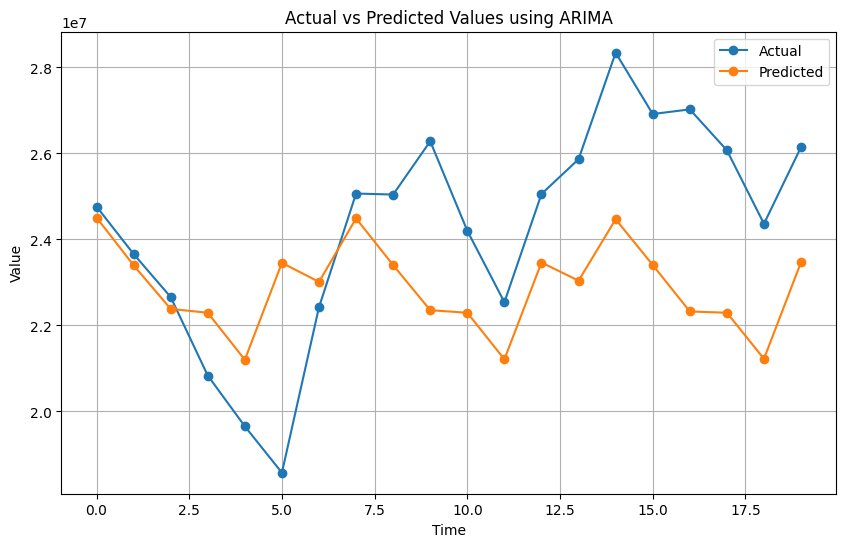

In [42]:
x = np.arange(20)
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(x, comparison_df.Actual, label='Actual', marker='o')
plt.plot(x, comparison_df.Predicted, label='Predicted', marker='o')

# Customize the plot
plt.title('Actual vs Predicted Values using ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Results for ARIMA

In [51]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',comparison_df['error_pct'][0],'%')
print('Error percent at 20th step:',comparison_df['error_pct'][19],'%')
print('Max error is',max(abs(comparison_df['error_pct'])),'%')

Mean Squared Error: 7203327963531.891
Error percent at 1st step: 1.0326811721741553 %
Error percent at 20th step: 10.245091979780042 %
Max error is 17.395344549761337 %


# Setting baseline using Prophet

In [15]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [13]:
pip --version

pip 22.0.2 from /usr/lib/python3/dist-packages/pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.


In [1]:
cols = train.columns[1:-1]
data.shape

NameError: name 'train' is not defined

In [68]:
#new df
df = pd.DataFrame({'dates':cols,'views':data})
df['dates'] = pd.to_datetime(df['dates'])
df['dates'].dtype

dtype('<M8[ns]')

In [7]:
import pandas as pd
df = pd.read_csv('Main_page_eng.csv',parse_dates=['dates'])

In [9]:
df['dates'].dtype

dtype('<M8[ns]')

In [19]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [46]:
any(df['views']==0)

False

In [20]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Extract the training data (first 530 points) and test data (last 20 points)
train_data = df.head(530)
test_data = df.tail(20)

# Prepare the data in the required format for Prophet
prophet_data = pd.DataFrame({'ds': train_data['dates'], 'y': train_data['views']})


In [21]:
# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)


17:15:20 - cmdstanpy - INFO - Chain [1] start processing
17:15:20 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Create a dataframe with the dates for prediction
future = model.make_future_dataframe(periods=20)

# Generate predictions for the future dates
forecast = model.predict(future)

actual_values = test_data['views'].values
predicted_values = forecast.tail(20)['yhat'].values

Mean Squared Error: 22740395714770.99


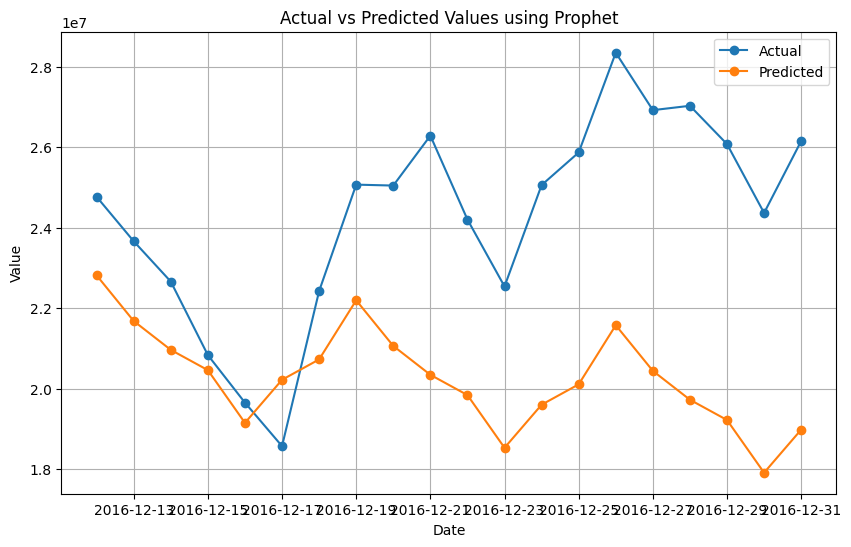

In [38]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(actual_values, predicted_values)
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test_data['dates'], actual_values, label='Actual', marker='o')
ax.plot(forecast.tail(20)['ds'], predicted_values, label='Predicted', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Prophet')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [39]:
df_res = pd.DataFrame({'Act':actual_values,'Pred':predicted_values})

In [41]:
df_res['error'] = (df_res['Act'] - df_res['Pred'])*100/df_res['Act']

In [43]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_res['error'][0],'%')
print('Error percent at 20th step:',df_res['error'][19],'%')
print('Max error is',max(df_res['error']),'%')

Mean Squared Error: 22740395714770.99
Error percent at 1st step: 7.877016194077989 %
Error percent at 20th step: 27.404859378893313 %
Max error is 27.404859378893313 %


## Neural Network approach

In [74]:
import pandas as pd
df = pd.read_csv('Main_page_eng.csv',parse_dates=['dates'])

In [75]:
df['weekend'] = (df['dates'].dt.dayofweek).astype(int)

In [76]:
df.head()

dates       views  weekend  views_std  views_mm  weekend_std
0 2015-07-01  20381244.0        2  -0.171824  0.125404    -0.632053
1 2015-07-02  20752194.0        3  -0.130894  0.132324    -0.632053
2 2015-07-03  19573968.0        4  -0.260896  0.110344    -0.632053
3 2015-07-04  20439644.0        5  -0.165380  0.126493     1.582146
4 2015-07-05  20772108.0        6  -0.128697  0.132695     1.582146

In [97]:
std

9063159.881547548

In [76]:
import numpy as np
import pandas as pd

mean = np.mean(df['views'])
std = np.std(df['views'])
mini = min(df['views'])
maxi = max(df['views'])

df['views_std'] = (df['views']-mean)/std
df['views_mm'] = (df['views']-mini)/(maxi-mini)

In [77]:
mean_wk = np.mean(df['weekend'])
std_wk = np.std(df['weekend'])

df['weekend_std'] = (df['weekend']-mean_wk)/std_wk

In [78]:
df.describe()

dates         views     weekend     views_std   
count                  550  5.500000e+02  550.000000  5.500000e+02  \
mean   2016-03-31 12:00:00  2.193851e+07    3.003636 -1.808654e-16   
min    2015-07-01 00:00:00  1.365894e+07    0.000000 -9.135413e-01   
25%    2015-11-15 06:00:00  1.809851e+07    1.000000 -4.236935e-01   
50%    2016-03-31 12:00:00  1.945753e+07    3.000000 -2.737431e-01   
75%    2016-08-15 18:00:00  2.221293e+07    5.000000  3.027884e-02   
max    2016-12-31 00:00:00  6.726426e+07    6.000000  5.001098e+00   
std                    NaN  9.071410e+06    1.997263  1.000910e+00   

         views_mm   weekend_std  
count  550.000000  5.500000e+02  
mean     0.154454  1.158669e-16  
min      0.000000 -1.505246e+00  
25%      0.082820 -1.004105e+00  
50%      0.108172 -1.822331e-03  
75%      0.159574  1.000460e+00  
max      1.000000  1.501601e+00  
std      0.169226  1.000910e+00

In [11]:
from sklearn.model_selection import train_test_split

data_normalized = df['views_std'][:-20]


# Function to prepare the dataset for LSTM
def create_dataset(data, look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data[i:(i + look_back)])
        y.append(data[(i + look_back):(i + look_back + forecast_horizon)])
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized, look_back, forecast_horizon)


In [13]:
df['views_std'].shape

(550,)

In [16]:
X.shape[0]

481

In [34]:
model = Sequential()
model.add(LSTM(30,activation='tanh',return_sequences=True,input_shape=(look_back, 1) ))

model.add(LSTM(60,activation='tanh',return_sequences=True))

model.add(LSTM(40,activation='tanh'))
          
model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mean_squared_error')


from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


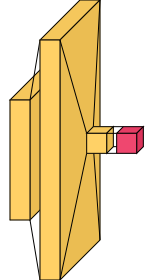

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized, look_back, forecast_horizon)


# Reshape the data for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], look_back, 1)


# Build the LSTM model
model = Sequential()
model.add(LSTM(30,activation='tanh',return_sequences=True,input_shape=(look_back, 1) ))

model.add(LSTM(60,activation='tanh',return_sequences=True))

model.add(LSTM(90,activation='tanh'))
          
model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mean_squared_error')

import visualkeras
visualkeras.layered_view(model)


# Vector model for multi-step time series forecasting

Epoch 1/150
16/16 [==============================] - 6s 28ms/step - loss: 1.0481
Epoch 2/150
16/16 [==============================] - 1s 32ms/step - loss: 0.9199
Epoch 3/150
16/16 [==============================] - 0s 29ms/step - loss: 0.8193
Epoch 4/150
16/16 [==============================] - 0s 28ms/step - loss: 0.7256
Epoch 5/150
16/16 [==============================] - 0s 27ms/step - loss: 0.6511
Epoch 6/150
16/16 [==============================] - 0s 26ms/step - loss: 0.6124
Epoch 7/150
16/16 [==============================] - 0s 30ms/step - loss: 0.6076
Epoch 8/150
16/16 [==============================] - 0s 29ms/step - loss: 0.5768
Epoch 9/150
16/16 [==============================] - 0s 26ms/step - loss: 0.5504
Epoch 10/150
16/16 [==============================] - 0s 25ms/step - loss: 0.5245
Epoch 11/150
16/16 [==============================] - 0s 30ms/step - loss: 0.5248
Epoch 12/150
16/16 [==============================] - 0s 27ms/step - loss: 0.5418
Epoch 13/150
16/16 [=====

16/16 [==============================] - 0s 26ms/step - loss: 0.0626
Epoch 102/150
16/16 [==============================] - 0s 27ms/step - loss: 0.0617
Epoch 103/150
16/16 [==============================] - 0s 27ms/step - loss: 0.0624
Epoch 104/150
16/16 [==============================] - 0s 25ms/step - loss: 0.0632
Epoch 105/150
16/16 [==============================] - 0s 24ms/step - loss: 0.0608
Epoch 106/150
16/16 [==============================] - 0s 27ms/step - loss: 0.0597
Epoch 107/150
16/16 [==============================] - 0s 25ms/step - loss: 0.0608
Epoch 108/150
16/16 [==============================] - 0s 27ms/step - loss: 0.0600
Epoch 109/150
16/16 [==============================] - 0s 28ms/step - loss: 0.0583
Epoch 110/150
16/16 [==============================] - 0s 27ms/step - loss: 0.0578
Epoch 111/150
16/16 [==============================] - 0s 26ms/step - loss: 0.0584
Epoch 112/150
16/16 [==============================] - 0s 25ms/step - loss: 0.1227
Epoch 113/150
16/1

KeyError: 'val_loss'

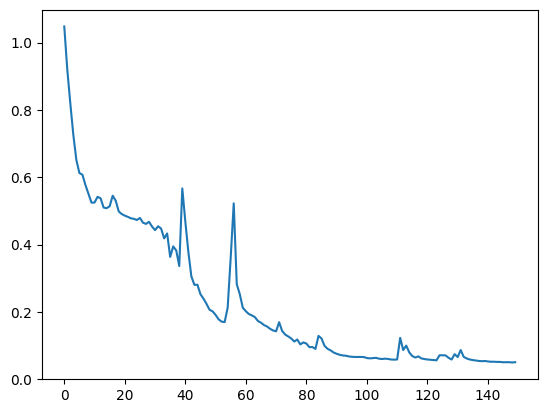

In [189]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt

data_normalized = df['views_std'][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data[i:(i + look_back)])
        y.append(data[(i + look_back):(i + look_back + forecast_horizon)])
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized, look_back, forecast_horizon)

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(Bidirectional(LSTM(30, activation='tanh', return_sequences=True), input_shape=(look_back, 1)))

model.add(LSTM(60,activation='tanh',return_sequences=True))

model.add(LSTM(40,activation='tanh'))
          
model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=150)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [195]:
X_test = np.array(df['views_std'][-50:-20])

X_test = X_test.reshape(1, look_back, 1)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

df_compare = df.tail(20).reset_index(drop=True).copy()

df_compare['y_hat'] = y_pred[0]

df_compare['views_pred_simple_vector'] = df_compare['y_hat']*std + mean

df_compare['error'] = (df_compare['views']-df_compare['views_pred_simple_vector'])*100/df_compare['views']
df_compare['mean'] = mean
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred_simple_vector'])
#print(f'Mean Squared Error: {mse}')

1/1 [==============================] - 0s 24ms/step


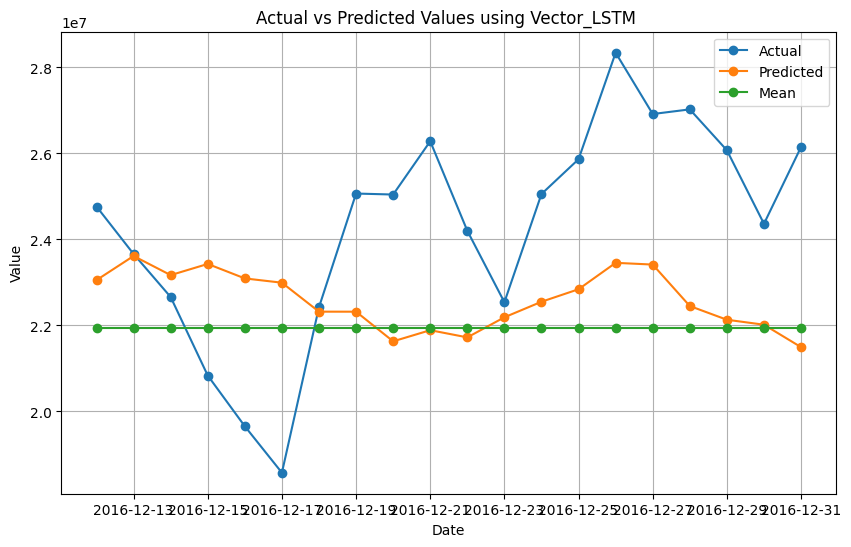

In [198]:
# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_simple_vector'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Vector_LSTM ')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [197]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 10066278997481.6
Error percent at 1st step: 6.910681117051346 %
Error percent at 20th step: 17.802676452434728 %
Max error is 23.797674364514094 %


In [187]:
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 30, 60)            7680      
 al)                                                             
                                                                 
 lstm_117 (LSTM)             (None, 30, 60)            29040     
                                                                 
 lstm_118 (LSTM)             (None, 40)                16160     
                                                                 
 dense_273 (Dense)           (None, 20)                820       
                                                                 
Total params: 53700 (209.77 KB)
Trainable params: 53700 (209.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Using Weekday-weekend feature

In [10]:
y

array([[[-0.44243852,  0.        ],
        [-0.41419584,  1.        ],
        [-0.27932102,  1.        ],
        ...,
        [-0.17997995,  0.        ],
        [-0.20475255,  0.        ],
        [-0.33535578,  0.        ]],

       [[-0.41419584,  1.        ],
        [-0.27932102,  1.        ],
        [-0.32948741,  0.        ],
        ...,
        [-0.20475255,  0.        ],
        [-0.33535578,  0.        ],
        [-0.31472324,  0.        ]],

       [[-0.27932102,  1.        ],
        [-0.32948741,  0.        ],
        [-0.15502839,  0.        ],
        ...,
        [-0.33535578,  0.        ],
        [-0.31472324,  0.        ],
        [-0.3354606 ,  0.        ]],

       ...,

       [[-0.17182386,  1.        ],
        [ 0.27360269,  0.        ],
        [ 0.22145024,  0.        ],
        ...,
        [ 0.10862712,  0.        ],
        [-0.00402322,  0.        ],
        [-0.26527206,  0.        ]],

       [[ 0.27360269,  0.        ],
        [ 0.22145024,  0.  

Epoch 1/100
14/14 [==============================] - 5s 74ms/step - loss: 1.1634 - val_loss: 0.0705
Epoch 2/100
14/14 [==============================] - 0s 25ms/step - loss: 0.9946 - val_loss: 0.1875
Epoch 3/100
14/14 [==============================] - 0s 25ms/step - loss: 0.8727 - val_loss: 0.2103
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 0.7974 - val_loss: 0.7354
Epoch 5/100
14/14 [==============================] - 0s 25ms/step - loss: 0.7270 - val_loss: 0.0837
Epoch 6/100
14/14 [==============================] - 0s 25ms/step - loss: 0.7129 - val_loss: 0.2778
Epoch 7/100
14/14 [==============================] - 0s 25ms/step - loss: 0.6467 - val_loss: 0.3709
Epoch 8/100
14/14 [==============================] - 0s 25ms/step - loss: 0.6442 - val_loss: 0.0645
Epoch 9/100
14/14 [==============================] - 0s 25ms/step - loss: 0.6533 - val_loss: 0.5573
Epoch 10/100
14/14 [==============================] - 0s 25ms/step - loss: 0.6090 - val_loss: 0.2908

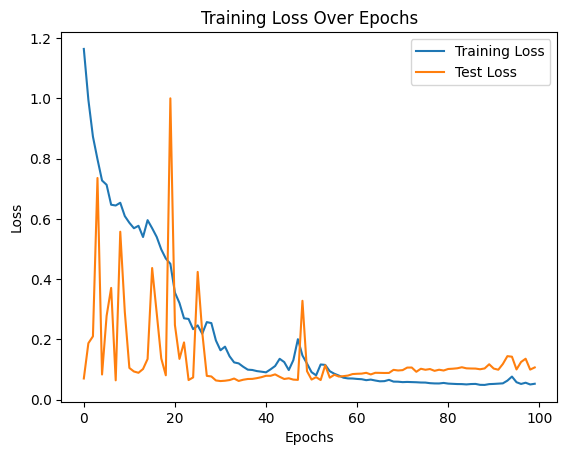

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

# Using two features:
data_normalized = df[['views_std', 'weekend']]
data_normalized2 = df[['views_std']]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True), input_shape=(look_back, 2)))

model.add(LSTM(100, activation='tanh' ,return_sequences=True))

model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=150,validation_split=0.15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Using encoder - decoder model

Epoch 1/150
16/16 [==============================] - 2s 13ms/step - loss: 0.8225
Epoch 2/150
16/16 [==============================] - 0s 13ms/step - loss: 0.8167
Epoch 3/150
16/16 [==============================] - 0s 12ms/step - loss: 0.7504
Epoch 4/150
16/16 [==============================] - 0s 13ms/step - loss: 0.6840
Epoch 5/150
16/16 [==============================] - 0s 13ms/step - loss: 0.6312
Epoch 6/150
16/16 [==============================] - 0s 13ms/step - loss: 0.6311
Epoch 7/150
16/16 [==============================] - 0s 13ms/step - loss: 0.6022
Epoch 8/150
16/16 [==============================] - 0s 12ms/step - loss: 0.6257
Epoch 9/150
16/16 [==============================] - 0s 13ms/step - loss: 0.5991
Epoch 10/150
16/16 [==============================] - 0s 13ms/step - loss: 0.5876
Epoch 11/150
16/16 [==============================] - 0s 13ms/step - loss: 0.5713
Epoch 12/150
16/16 [==============================] - 0s 13ms/step - loss: 0.5431
Epoch 13/150
16/16 [=====

16/16 [==============================] - 0s 13ms/step - loss: 0.1516
Epoch 102/150
16/16 [==============================] - 0s 13ms/step - loss: 0.1893
Epoch 103/150
16/16 [==============================] - 0s 12ms/step - loss: 0.1308
Epoch 104/150
16/16 [==============================] - 0s 12ms/step - loss: 0.1217
Epoch 105/150
16/16 [==============================] - 0s 12ms/step - loss: 0.1032
Epoch 106/150
16/16 [==============================] - 0s 13ms/step - loss: 0.1323
Epoch 107/150
16/16 [==============================] - 0s 13ms/step - loss: 0.1304
Epoch 108/150
16/16 [==============================] - 0s 13ms/step - loss: 0.1097
Epoch 109/150
16/16 [==============================] - 0s 13ms/step - loss: 0.1097
Epoch 110/150
16/16 [==============================] - 0s 13ms/step - loss: 0.0987
Epoch 111/150
16/16 [==============================] - 0s 13ms/step - loss: 0.0913
Epoch 112/150
16/16 [==============================] - 0s 13ms/step - loss: 0.0986
Epoch 113/150
16/1

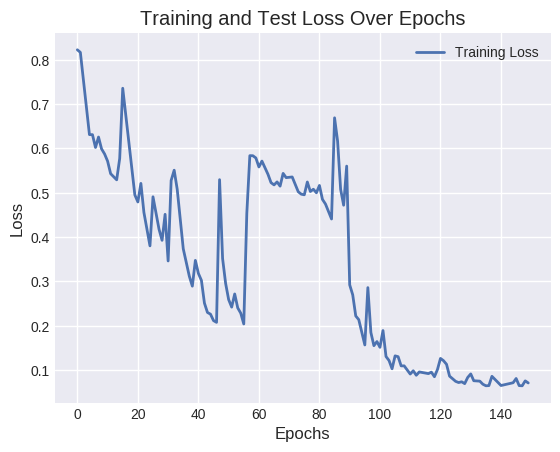

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten,RNN
from tensorflow.keras.layers import Bidirectional,RepeatVector
import matplotlib.pyplot as plt

data_normalized = df['views_std'][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data[i:(i + look_back)])
        y.append(data[(i + look_back):(i + look_back + forecast_horizon)])
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized, look_back, forecast_horizon)

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='tanh', input_shape=(look_back, 1)))

model.add(RepeatVector(forecast_horizon))

model.add(LSTM(100,activation='tanh', return_sequences = True))

model.add(TimeDistributed(Dense(1)))

#model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=150)

plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
df_compare['mean'] = mean

In [59]:
df_compare.head()

dates       views  weekend  views_std  views_mm  weekend_std   y_hat_1   
0 2016-12-12  24765200.0        0   0.311888  0.207186    -1.505246  0.015803  \
1 2016-12-13  23661288.0        1   0.190086  0.186592    -1.004105 -0.009128   
2 2016-12-14  22659908.0        2   0.079597  0.167912    -0.502963 -0.012858   
3 2016-12-15  20834184.0        3  -0.121848  0.133853    -0.001822 -0.002119   
4 2016-12-16  19653624.0        4  -0.252107  0.111830     0.499319  0.001876   

   views_pred_enc_dec      error          mean  
0          22081734.0  10.835632  2.193851e+07  
1          21855780.0   7.630641  2.193851e+07  
2          21821974.0   3.697870  2.193851e+07  
3          21919306.0  -5.208373  2.193851e+07  
4          21955518.0 -11.712313  2.193851e+07

1/1 [==============================] - 0s 333ms/step


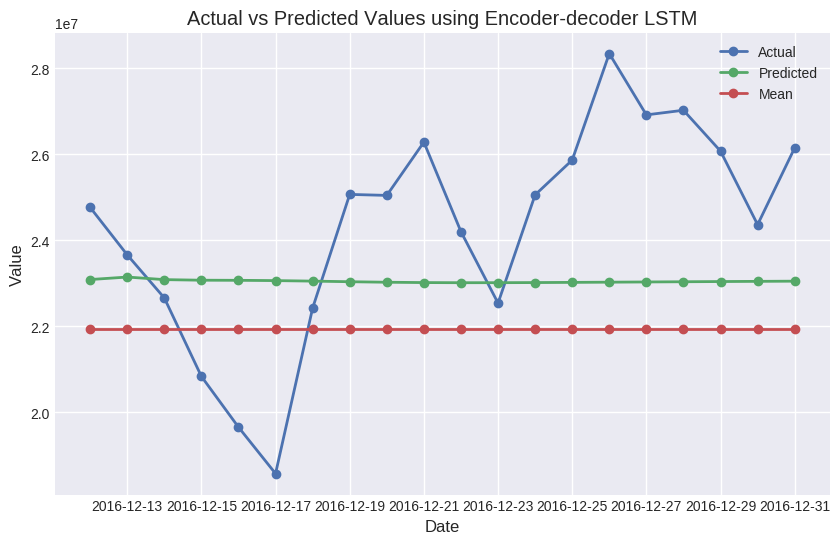

In [70]:
X_test = np.array(df['views_std'][-50:-20])

X_test = X_test.reshape(1, look_back, 1)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

#df_compare = df.tail(20).reset_index(drop=True).copy()

df_compare['y_hat_1'] = y_pred[0]

df_compare['views_pred_enc_dec'] = df_compare['y_hat_1']*std + mean

df_compare['error'] = (df_compare['views']-df_compare['views_pred_enc_dec'])*100/df_compare['views']

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred_enc_dec'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_enc_dec'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Encoder-decoder LSTM')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [67]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 9202933176696.4
Error percent at 1st step: 10.250633954096878 %
Error percent at 20th step: 13.693655796622044 %
Max error is 22.400145928307335 %


In [135]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 100)               40800     
                                                                 
 repeat_vector_17 (RepeatVe  (None, 20, 100)           0         
 ctor)                                                           
                                                                 
 lstm_77 (LSTM)              (None, 20, 100)           80400     
                                                                 
 time_distributed_39 (TimeD  (None, 20, 1)             101       
 istributed)                                                     
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='tanh', input_shape=(look_back, 2)))

model.add(RepeatVector(forecast_horizon))

model.add(LSTM(100,activation='tanh', return_sequences = True))

model.add(TimeDistributed(Dense(1)))

#model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 100)               41200     
                                                                 
 repeat_vector_11 (RepeatVe  (None, 20, 100)           0         
 ctor)                                                           
                                                                 
 lstm_52 (LSTM)              (None, 20, 100)           80400     
                                                                 
 time_distributed_28 (TimeD  (None, 20, 1)             101       
 istributed)                                                     
                                                                 
Total params: 121701 (475.39 KB)
Trainable params: 121701 (475.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
14/14 [==============================] - 2s 44ms/step - loss: 0.9871 - val_loss: 0.0546
Epoch 2/200
14/14 [==============================] - 0s 15ms/step - loss: 0.8243 - val_loss: 0.0825
Epoch 3/200
14/14 [==============================] - 0s 15ms/step - loss: 0.7212 - val_loss: 0.1227
Epoch 4/200
14/14 [==============================] - 0s 14ms/step - loss: 0.6701 - val_loss: 0.1900
Epoch 5/200
14/14 [==============================] - 0s 15ms/step - loss: 0.6627 - val_loss: 0.2239
Epoch 6/200
14/14 [==============================] - 0s 15ms/step - loss: 0.6617 - val_loss: 0.1830
Epoch 7/200
14/14 [==============================] - 0s 14ms/step - loss: 0.6375 - val_loss: 0.1649
Epoch 8/200
14/14 [==============================] - 0s 15ms/step - loss: 0.6102 - val_loss: 0.2129
Epoch 9/200
14/14 [==============================] - 0s 14ms/step - loss: 0.5939 - val_loss: 0.2604
Epoch 10/200
14/14 [==============================] - 0s 14ms/step - loss: 0.5850 - val_loss: 0.3756

14/14 [==============================] - 0s 14ms/step - loss: 0.0458 - val_loss: 0.0693
Epoch 163/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0645
Epoch 164/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0646 - val_loss: 0.0726
Epoch 165/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0515 - val_loss: 0.0632
Epoch 166/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0569 - val_loss: 0.0647
Epoch 167/200
14/14 [==============================] - 0s 15ms/step - loss: 0.0549 - val_loss: 0.0519
Epoch 168/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0719 - val_loss: 0.0533
Epoch 169/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0837 - val_loss: 0.0502
Epoch 170/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0494 - val_loss: 0.0851
Epoch 171/200
14/14 [==============================] - 0s 14ms/step - loss: 0.0447 - val_loss: 0

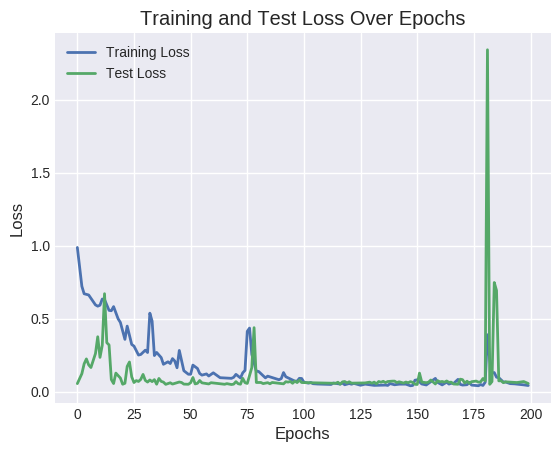

In [109]:
#Using weeekends as well

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten
from tensorflow.keras.layers import Bidirectional,RepeatVector
import matplotlib.pyplot as plt

data_normalized = df[['views_std', 'weekend_std']][:-20]
data_normalized2 = df[['views_std']][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)


# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='tanh', input_shape=(look_back, 2)))

model.add(RepeatVector(forecast_horizon))

model.add(LSTM(100,activation='tanh', return_sequences = True))

model.add(TimeDistributed(Dense(1)))

#model.add(Dense(forecast_horizon))  # Output layer with the forecast horizon
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=200,validation_split=0.1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 339ms/step


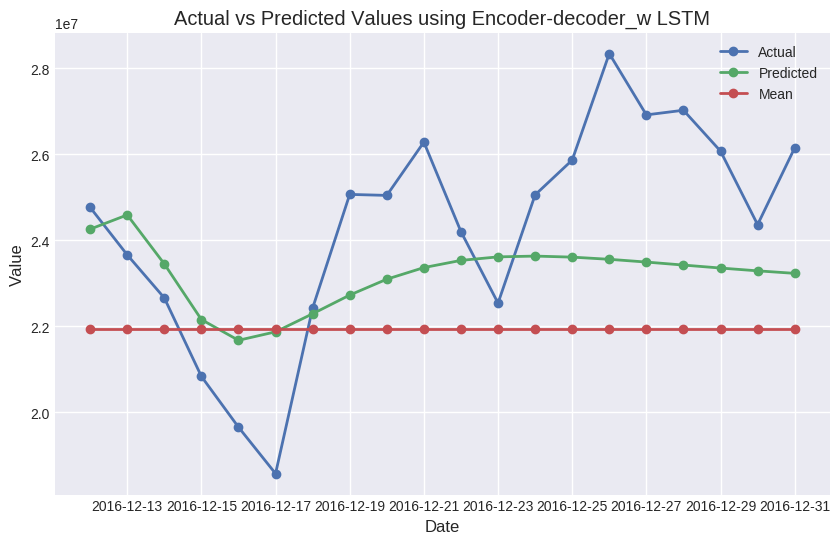

In [110]:
X_test = np.array(df[['views_std', 'weekend_std']][-50:-20])

X_test = X_test.reshape(1, look_back, 2)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

#df_compare = df.tail(20).reset_index(drop=True).copy()

df_compare['y_hat_1'] = y_pred[0]

df_compare['views_pred_enc_dec'] = df_compare['y_hat_1']*std + mean

df_compare['error'] = (df_compare['views']-df_compare['views_pred_enc_dec'])*100/df_compare['views']

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred_enc_dec'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_enc_dec'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Encoder-decoder_w LSTM')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [112]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 5482338234067.4
Error percent at 1st step: 2.043221940464846 %
Error percent at 20th step: 11.161718332330128 %
Max error is 17.75285912663545 %


In [113]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 100)               41200     
                                                                 
 repeat_vector_18 (RepeatVe  (None, 20, 100)           0         
 ctor)                                                           
                                                                 
 lstm_39 (LSTM)              (None, 20, 100)           80400     
                                                                 
 time_distributed_19 (TimeD  (None, 20, 1)             101       
 istributed)                                                     
                                                                 
Total params: 121701 (475.39 KB)
Trainable params: 121701 (475.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Build the LSTM model with a CNN layer
from tensorflow.keras.layers import Reshape

model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=(look_back, 2)))

# Optional: Add MaxPooling layer
#model.add(MaxPooling1D(pool_size=2))

# You can either flatten or use another LSTM layer
#model.add(Flatten())

model.add(LSTM(20, activation='tanh',return_sequences=True))

model.add(Reshape((20, 28)))

# TimeDistributed layer with a Dense layer
model.add(TimeDistributed(Dense(1)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [57]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 28, 20)            140       
                                                                 
 reshape_5 (Reshape)         (None, 20, 28)            0         
                                                                 
 lstm_33 (LSTM)              (None, 20, 20)            3920      
                                                                 
 lstm_34 (LSTM)              (None, 20, 20)            3280      
                                                                 
 time_distributed_19 (TimeD  (None, 20, 1)             21        
 istributed)                                                     
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [73]:
df.head()

dates       views  weekend  views_std  views_mm  weekend_std
0 2015-07-01  20381244.0        0  -0.171824  0.125404    -0.632053
1 2015-07-02  20752194.0        0  -0.130894  0.132324    -0.632053
2 2015-07-03  19573968.0        0  -0.260896  0.110344    -0.632053
3 2015-07-04  20439644.0        1  -0.165380  0.126493     1.582146
4 2015-07-05  20772108.0        1  -0.128697  0.132695     1.582146

Epoch 1/800
16/16 [==============================] - 2s 10ms/step - loss: 1.1454
Epoch 2/800
16/16 [==============================] - 0s 10ms/step - loss: 1.1186
Epoch 3/800
16/16 [==============================] - 0s 9ms/step - loss: 1.1043
Epoch 4/800
16/16 [==============================] - 0s 8ms/step - loss: 1.0953
Epoch 5/800
16/16 [==============================] - 0s 11ms/step - loss: 1.0871
Epoch 6/800
16/16 [==============================] - 0s 12ms/step - loss: 1.0790
Epoch 7/800
16/16 [==============================] - 0s 9ms/step - loss: 1.0687
Epoch 8/800
16/16 [==============================] - 0s 11ms/step - loss: 1.0622
Epoch 9/800
16/16 [==============================] - 0s 9ms/step - loss: 1.0514
Epoch 10/800
16/16 [==============================] - 0s 10ms/step - loss: 1.0464
Epoch 11/800
16/16 [==============================] - 0s 12ms/step - loss: 1.0363
Epoch 12/800
16/16 [==============================] - 0s 10ms/step - loss: 1.0365
Epoch 13/800
16/16 [=========

16/16 [==============================] - 0s 10ms/step - loss: 0.8343
Epoch 201/800
16/16 [==============================] - 0s 10ms/step - loss: 0.7845
Epoch 202/800
16/16 [==============================] - 0s 9ms/step - loss: 0.7414
Epoch 203/800
16/16 [==============================] - 0s 9ms/step - loss: 0.6953
Epoch 204/800
16/16 [==============================] - 0s 9ms/step - loss: 0.6678
Epoch 205/800
16/16 [==============================] - 0s 10ms/step - loss: 0.6403
Epoch 206/800
16/16 [==============================] - 0s 9ms/step - loss: 0.6273
Epoch 207/800
16/16 [==============================] - 0s 10ms/step - loss: 0.6016
Epoch 208/800
16/16 [==============================] - 0s 8ms/step - loss: 0.5833
Epoch 209/800
16/16 [==============================] - 0s 11ms/step - loss: 0.5484
Epoch 210/800
16/16 [==============================] - 0s 10ms/step - loss: 0.5359
Epoch 211/800
16/16 [==============================] - 0s 8ms/step - loss: 0.5272
Epoch 212/800
16/16 [===

16/16 [==============================] - 0s 10ms/step - loss: 0.1981
Epoch 399/800
16/16 [==============================] - 0s 11ms/step - loss: 0.1971
Epoch 400/800
16/16 [==============================] - 0s 9ms/step - loss: 0.1966
Epoch 401/800
16/16 [==============================] - 0s 9ms/step - loss: 0.3416
Epoch 402/800
16/16 [==============================] - 0s 8ms/step - loss: 0.6467
Epoch 403/800
16/16 [==============================] - 0s 9ms/step - loss: 0.2815
Epoch 404/800
16/16 [==============================] - 0s 10ms/step - loss: 0.2281
Epoch 405/800
16/16 [==============================] - 0s 8ms/step - loss: 0.2124
Epoch 406/800
16/16 [==============================] - 0s 11ms/step - loss: 0.2091
Epoch 407/800
16/16 [==============================] - 0s 8ms/step - loss: 0.2056
Epoch 408/800
16/16 [==============================] - 0s 9ms/step - loss: 0.2036
Epoch 409/800
16/16 [==============================] - 0s 11ms/step - loss: 0.2032
Epoch 410/800
16/16 [====

16/16 [==============================] - 0s 9ms/step - loss: 0.4737
Epoch 597/800
16/16 [==============================] - 0s 9ms/step - loss: 0.2349
Epoch 598/800
16/16 [==============================] - 0s 8ms/step - loss: 0.1750
Epoch 599/800
16/16 [==============================] - 0s 10ms/step - loss: 0.1634
Epoch 600/800
16/16 [==============================] - 0s 9ms/step - loss: 0.1591
Epoch 601/800
16/16 [==============================] - 0s 9ms/step - loss: 0.1554
Epoch 602/800
16/16 [==============================] - 0s 11ms/step - loss: 0.1537
Epoch 603/800
16/16 [==============================] - 0s 8ms/step - loss: 0.1523
Epoch 604/800
16/16 [==============================] - 0s 10ms/step - loss: 0.1510
Epoch 605/800
16/16 [==============================] - 0s 8ms/step - loss: 0.1516
Epoch 606/800
16/16 [==============================] - 0s 8ms/step - loss: 0.1500
Epoch 607/800
16/16 [==============================] - 0s 11ms/step - loss: 0.1521
Epoch 608/800
16/16 [=====

16/16 [==============================] - 0s 9ms/step - loss: 0.1234
Epoch 795/800
16/16 [==============================] - 0s 6ms/step - loss: 0.1412
Epoch 796/800
16/16 [==============================] - 0s 9ms/step - loss: 0.1315
Epoch 797/800
16/16 [==============================] - 0s 11ms/step - loss: 0.1276
Epoch 798/800
16/16 [==============================] - 0s 9ms/step - loss: 0.1250
Epoch 799/800
16/16 [==============================] - 0s 10ms/step - loss: 0.1236
Epoch 800/800
16/16 [==============================] - 0s 10ms/step - loss: 0.1232


KeyError: 'val_loss'

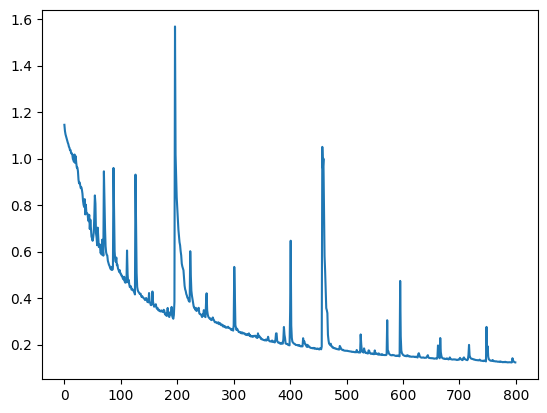

In [227]:
#Using Conv1D layer for attention
from tensorflow.keras.layers import Reshape
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten
from tensorflow.keras.layers import Bidirectional,RepeatVector
import matplotlib.pyplot as plt

data_normalized = df[['views_std', 'weekend_std']][:-20]
data_normalized2 = df[['views_std']][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)


model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=(look_back, 2)))


model.add(LSTM(20, activation='tanh',return_sequences=True))

#model.add(LSTM(20, activation='tanh',return_sequences=True))

model.add(Reshape((20, 28)))
#model.add(Reshape((20, 28)))

# TimeDistributed layer with a Dense layer
model.add(TimeDistributed(Dense(1)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# # Build the LSTM model with a CNN layer
# model = Sequential()
# model.add(LSTM(100, activation='tanh', input_shape=(look_back, 2)))
# model.add(RepeatVector(forecast_horizon+2))

# # Add CNN layer
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# # Optional: Add MaxPooling layer
# #model.add(MaxPooling1D(pool_size=2))

# # You can either flatten or use another LSTM layer
# #model.add(Flatten())

# model.add(LSTM(100, activation='tanh',return_sequences=True))

# # TimeDistributed layer with a Dense layer
# model.add(TimeDistributed(Dense(1)))

# # Compile the model
#model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=800)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 363ms/step


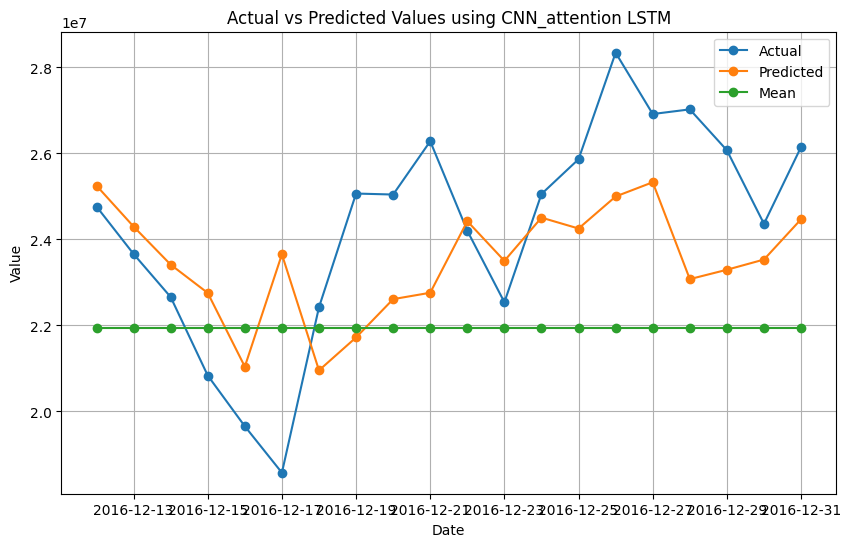

In [228]:
X_test = np.array(df[['views_std', 'weekend_std']][-50:-20])

X_test = X_test.reshape(1, look_back, 2)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

#df_compare = df.tail(20).reset_index(drop=True).copy()

df_compare['y_hat_2'] = y_pred[0]

df_compare['views_pred_attn'] = df_compare['y_hat_2']*std + mean

df_compare['error'] = (df_compare['views']-df_compare['views_pred_attn'])*100/df_compare['views']

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred_attn'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_attn'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using CNN_attention LSTM')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [229]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 5436690644659.6
Error percent at 1st step: -1.9609290455962398 %
Error percent at 20th step: 6.426193347951819 %
Max error is 27.350681917639236 %


Epoch 1/400
13/13 [==============================] - 4s 88ms/step - loss: 1.2450 - val_loss: 0.0937
Epoch 2/400
13/13 [==============================] - 0s 27ms/step - loss: 1.1236 - val_loss: 0.1280
Epoch 3/400
13/13 [==============================] - 0s 27ms/step - loss: 1.0555 - val_loss: 0.0815
Epoch 4/400
13/13 [==============================] - 0s 30ms/step - loss: 0.9562 - val_loss: 0.1024
Epoch 5/400
13/13 [==============================] - 0s 28ms/step - loss: 0.8845 - val_loss: 0.0866
Epoch 6/400
13/13 [==============================] - 0s 34ms/step - loss: 0.8213 - val_loss: 0.0902
Epoch 7/400
13/13 [==============================] - 0s 29ms/step - loss: 0.7938 - val_loss: 0.0942
Epoch 8/400
13/13 [==============================] - 0s 33ms/step - loss: 0.7817 - val_loss: 0.0961
Epoch 9/400
13/13 [==============================] - 0s 30ms/step - loss: 0.7555 - val_loss: 0.0822
Epoch 10/400
13/13 [==============================] - 0s 29ms/step - loss: 0.7369 - val_loss: 0.0860

13/13 [==============================] - 0s 29ms/step - loss: 0.4136 - val_loss: 2.8372
Epoch 163/400
13/13 [==============================] - 0s 27ms/step - loss: 0.4084 - val_loss: 1.7044
Epoch 164/400
13/13 [==============================] - 0s 29ms/step - loss: 0.3801 - val_loss: 3.4488
Epoch 165/400
13/13 [==============================] - 0s 28ms/step - loss: 0.3555 - val_loss: 2.6718
Epoch 166/400
13/13 [==============================] - 0s 32ms/step - loss: 0.3436 - val_loss: 4.0304
Epoch 167/400
13/13 [==============================] - 0s 28ms/step - loss: 0.3411 - val_loss: 2.8132
Epoch 168/400
13/13 [==============================] - 0s 30ms/step - loss: 0.3222 - val_loss: 3.2557
Epoch 169/400
13/13 [==============================] - 0s 29ms/step - loss: 0.4209 - val_loss: 1.7346
Epoch 170/400
13/13 [==============================] - 0s 29ms/step - loss: 0.3932 - val_loss: 3.1269
Epoch 171/400
13/13 [==============================] - 0s 31ms/step - loss: 0.3826 - val_loss: 2

13/13 [==============================] - 0s 32ms/step - loss: 0.2324 - val_loss: 4.6093
Epoch 323/400
13/13 [==============================] - 0s 26ms/step - loss: 0.2646 - val_loss: 4.8895
Epoch 324/400
13/13 [==============================] - 0s 29ms/step - loss: 0.2425 - val_loss: 4.7280
Epoch 325/400
13/13 [==============================] - 0s 28ms/step - loss: 0.2367 - val_loss: 4.5622
Epoch 326/400
13/13 [==============================] - 0s 27ms/step - loss: 0.2396 - val_loss: 4.0659
Epoch 327/400
13/13 [==============================] - 0s 27ms/step - loss: 0.2298 - val_loss: 4.2788
Epoch 328/400
13/13 [==============================] - 0s 27ms/step - loss: 0.2279 - val_loss: 4.3853
Epoch 329/400
13/13 [==============================] - 0s 30ms/step - loss: 0.2233 - val_loss: 4.5314
Epoch 330/400
13/13 [==============================] - 0s 29ms/step - loss: 0.2223 - val_loss: 4.6444
Epoch 331/400
13/13 [==============================] - 0s 27ms/step - loss: 0.2196 - val_loss: 4

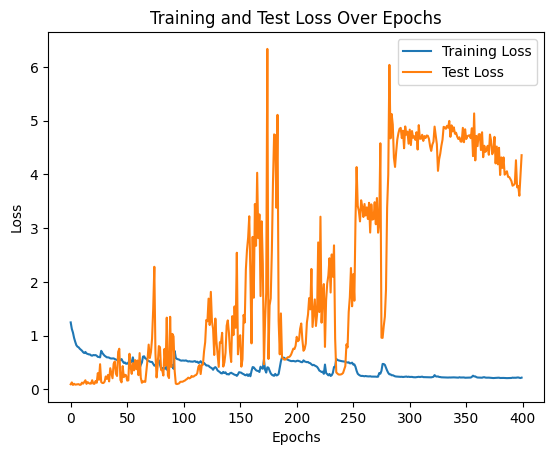

In [220]:
#Using Conv1D layer for attention
from tensorflow.keras.layers import Reshape
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten
from tensorflow.keras.layers import Bidirectional,RepeatVector
import matplotlib.pyplot as plt

data_normalized = df[['views_std', 'weekend_std']][:-20]
data_normalized2 = df[['views_std']][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)


model = Sequential()

from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, RepeatVector, Permute, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow.keras.backend as K

def attention_layer(inputs, time_steps):
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul


# Input layer
inputs = Input(shape=(look_back, 2))

#Repeat = RepeatVector(forecast_horizon)(inputs)

# Attention layer
attention_mul = attention_layer(inputs, look_back)

# First LSTM layer
lstm_out_1 = LSTM(100, activation='tanh')(attention_mul)

# RepeatVector layerb
Repeat = RepeatVector(forecast_horizon)(lstm_out_1)

# Second LSTM layer
lstm_out = LSTM(100, activation='tanh', return_sequences=True)(Repeat)

#truncated_output = Lambda(lambda x: x[:, :20 , :])(lstm_out_1)

# TimeDistributed layer
output = TimeDistributed(Dense(1))(lstm_out)

# Build the model
model = Model(inputs=[inputs], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=400, validation_split=0.15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
from keras.layers import Permute, Dense, Multiply

def attention_layer(inputs, time_steps, layer_name):
    # inputs.shape = (batch_size, time_steps, input_dim)
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax', name=layer_name + '_dense')(a)
    a_probs = Permute((2, 1), name=layer_name + '_permute')(a)
    output_attention_mul = Multiply(name=layer_name + '_multiply')([inputs, a_probs])
    return output_attention_mul

# Assuming `inputs` and `time_steps` are defined
parallel_layers = []
for i in range(20):
    layer_name = f'attention_layer_{i}'
    layer = attention_layer(inputs, 30, layer_name)
    parallel_layers.append(layer)

In [89]:
parallel_layers

[<tf.Tensor: shape=(481, 30, 2), dtype=float32, numpy=
 array([[[-7.0613255e-03, -1.1755465e-02],
         [-3.0665866e-03, -5.3899268e-05],
         [-7.5706770e-03,  4.2446136e-02],
         ...,
         [-7.1875514e-03, -4.9103554e-02],
         [ 3.6932208e-02, -1.2402516e-02],
         [-1.7271854e-02, -1.6688055e-05]],
 
        [[-6.0277730e-03, -8.2021415e-06],
         [-7.2374824e-03,  8.6305328e-03],
         [-3.6470140e-03,  5.0202146e-02],
         ...,
         [ 2.9396448e-02, -1.2983867e-02],
         [-1.7787848e-02, -2.5369836e-05],
         [-1.9669818e-02,  5.5836742e-03]],
 
        [[-7.2653997e-03,  4.1114665e-03],
         [-4.5832451e-03,  2.9923897e-03],
         [-3.3782122e-03,  6.8533473e-02],
         ...,
         [-1.1262608e-02, -6.0520983e-05],
         [-3.6849577e-02,  1.1175819e-02],
         [-1.9609898e-02,  4.6360895e-02]],
 
        ...,
 
        [[-5.1442711e-03,  4.1114665e-03],
         [ 7.0864763e-03,  2.9923897e-03],
         [ 5.948854

In [87]:
inputs = X

Epoch 1/800
13/13 [==============================] - 4s 70ms/step - loss: 1.1432 - val_loss: 0.0823
Epoch 2/800
13/13 [==============================] - 0s 17ms/step - loss: 0.9483 - val_loss: 0.0926
Epoch 3/800
13/13 [==============================] - 0s 17ms/step - loss: 0.8538 - val_loss: 0.0808
Epoch 4/800
13/13 [==============================] - 0s 16ms/step - loss: 0.7574 - val_loss: 0.0869
Epoch 5/800
13/13 [==============================] - 0s 17ms/step - loss: 0.7399 - val_loss: 0.1091
Epoch 6/800
13/13 [==============================] - 0s 17ms/step - loss: 0.7058 - val_loss: 0.1003
Epoch 7/800
13/13 [==============================] - 0s 17ms/step - loss: 0.6730 - val_loss: 0.1293
Epoch 8/800
13/13 [==============================] - 0s 16ms/step - loss: 0.6465 - val_loss: 0.1159
Epoch 9/800
13/13 [==============================] - 0s 17ms/step - loss: 0.6236 - val_loss: 0.1337
Epoch 10/800
13/13 [==============================] - 0s 18ms/step - loss: 0.6253 - val_loss: 0.1113

13/13 [==============================] - 0s 17ms/step - loss: 0.3309 - val_loss: 0.5034
Epoch 163/800
13/13 [==============================] - 0s 18ms/step - loss: 0.3263 - val_loss: 0.4637
Epoch 164/800
13/13 [==============================] - 0s 17ms/step - loss: 0.3149 - val_loss: 0.4835
Epoch 165/800
13/13 [==============================] - 0s 17ms/step - loss: 0.3041 - val_loss: 0.4299
Epoch 166/800
13/13 [==============================] - 0s 17ms/step - loss: 0.3029 - val_loss: 0.4140
Epoch 167/800
13/13 [==============================] - 0s 17ms/step - loss: 0.3115 - val_loss: 0.5272
Epoch 168/800
13/13 [==============================] - 0s 17ms/step - loss: 0.2898 - val_loss: 0.4793
Epoch 169/800
13/13 [==============================] - 0s 18ms/step - loss: 0.2555 - val_loss: 0.5628
Epoch 170/800
13/13 [==============================] - 0s 17ms/step - loss: 0.2316 - val_loss: 0.9355
Epoch 171/800
13/13 [==============================] - 0s 17ms/step - loss: 0.1904 - val_loss: 1

13/13 [==============================] - 0s 17ms/step - loss: 0.1205 - val_loss: 0.2093
Epoch 323/800
13/13 [==============================] - 0s 17ms/step - loss: 0.1156 - val_loss: 0.2190
Epoch 324/800
13/13 [==============================] - 0s 17ms/step - loss: 0.1118 - val_loss: 0.2120
Epoch 325/800
13/13 [==============================] - 0s 17ms/step - loss: 0.1025 - val_loss: 0.2444
Epoch 326/800
13/13 [==============================] - 0s 19ms/step - loss: 0.0962 - val_loss: 0.2247
Epoch 327/800
13/13 [==============================] - 0s 18ms/step - loss: 0.0956 - val_loss: 0.2381
Epoch 328/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0943 - val_loss: 0.2309
Epoch 329/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0947 - val_loss: 0.2269
Epoch 330/800
13/13 [==============================] - 0s 18ms/step - loss: 0.1016 - val_loss: 0.2490
Epoch 331/800
13/13 [==============================] - 0s 18ms/step - loss: 0.1018 - val_loss: 0

13/13 [==============================] - 0s 17ms/step - loss: 0.0800 - val_loss: 1.9187
Epoch 483/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0749 - val_loss: 1.0561
Epoch 484/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0754 - val_loss: 1.0889
Epoch 485/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0766 - val_loss: 1.2061
Epoch 486/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0830 - val_loss: 1.5043
Epoch 487/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0730 - val_loss: 1.5661
Epoch 488/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0709 - val_loss: 1.7313
Epoch 489/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0684 - val_loss: 1.6080
Epoch 490/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0727 - val_loss: 1.7951
Epoch 491/800
13/13 [==============================] - 0s 18ms/step - loss: 0.0661 - val_loss: 2

13/13 [==============================] - 0s 17ms/step - loss: 0.0217 - val_loss: 1.8164
Epoch 643/800
13/13 [==============================] - 0s 16ms/step - loss: 0.0237 - val_loss: 1.8158
Epoch 644/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0225 - val_loss: 1.7707
Epoch 645/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0233 - val_loss: 1.9090
Epoch 646/800
13/13 [==============================] - 0s 18ms/step - loss: 0.0295 - val_loss: 1.7666
Epoch 647/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0260 - val_loss: 1.6896
Epoch 648/800
13/13 [==============================] - 0s 16ms/step - loss: 0.0298 - val_loss: 1.7706
Epoch 649/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0266 - val_loss: 1.6358
Epoch 650/800
13/13 [==============================] - 0s 16ms/step - loss: 0.0260 - val_loss: 1.8959
Epoch 651/800
13/13 [==============================] - 0s 17ms/step - loss: 0.0352 - val_loss: 1

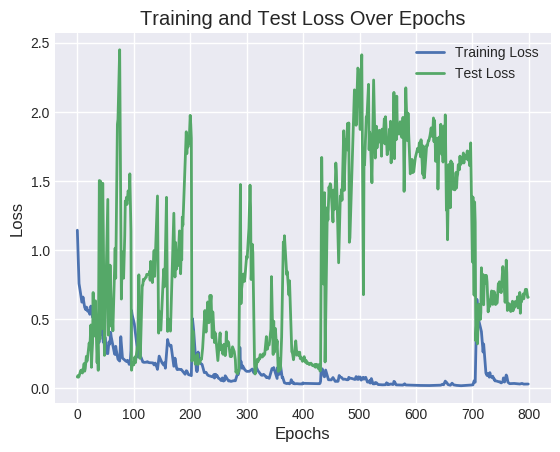

In [95]:
#applying different attention for each layer
from tensorflow.keras.layers import Reshape
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM, Dense,TimeDistributed,MaxPooling1D,Flatten
from tensorflow.keras.layers import Bidirectional,RepeatVector
from keras.layers import Permute, Dense, Multiply, Concatenate
import matplotlib.pyplot as plt

data_normalized = df[['views_std', 'weekend_std']][:-20]
data_normalized2 = df[['views_std']][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)

model = Sequential()
# Define your model
time_steps =  look_back
forecast_horizon = 20
num_heads = 20  # Number of attention heads
layer_name_prefix = 'multi_head_attention'

def multi_head_attention_layer(inputs, time_steps, num_heads, layer_name_prefix):
    # inputs.shape = (batch_size, time_steps, input_dim) 
    attention_heads = []
    for i in range(num_heads):
        # Create unique names for layers in each head
        dense_layer_name = f"{layer_name_prefix}_dense_head_{i}"
        permute_layer_name = f"{layer_name_prefix}_permute_head_{i}"
        multiply_layer_name = f"{layer_name_prefix}_multiply_head_{i}"

        # Attention mechanism for each head
        a = Permute((2, 1))(inputs)
        a = Dense(time_steps, activation='softmax', name=dense_layer_name)(a)
        a_probs = Permute((2, 1), name=permute_layer_name)(a)
        attention_head = Multiply(name=multiply_layer_name)([inputs, a_probs])
        attention_heads.append(attention_head)

    # Concatenate all heads' outputs
    output_attention_mul = Concatenate(name=f"{layer_name_prefix}_concatenate")(attention_heads)
    return output_attention_mul


num_heads = 20  
layer_name_prefix = 'multi_head_attention'
output = multi_head_attention_layer(inputs, time_steps, num_heads, layer_name_prefix)



# Input Layer
inputs = Input(shape=(30, 2))

# Multi-Head Attention layer
attention_out = multi_head_attention_layer(inputs, time_steps, num_heads, layer_name_prefix)

# First LSTM layer
lstm_out_1 = LSTM(100, activation='tanh')(attention_out)

# RepeatVector layer
Repeat = RepeatVector(forecast_horizon)(lstm_out_1)

# Second LSTM layer
lstm_out_2 = LSTM(100, activation='tanh', return_sequences=True)(Repeat)

# TimeDistributed layer
output = TimeDistributed(Dense(1))(lstm_out_2)

# Build the model
model = Model(inputs=[inputs], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
# Assuming X and y are your training data and labels
history = model.fit(X, y, epochs=800, validation_split=0.15)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 504ms/step


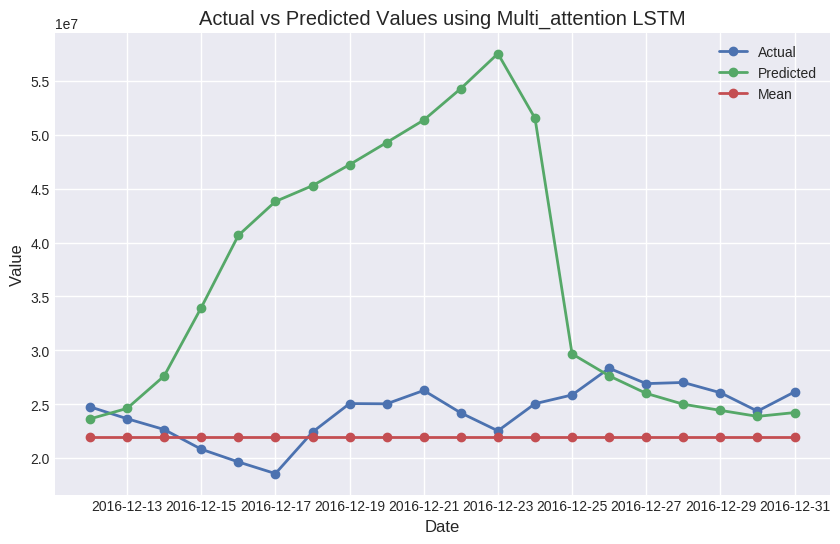

In [93]:
X_test = np.array(df[['views_std', 'weekend_std']][-50:-20])

X_test = X_test.reshape(1, look_back, 2)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

#df_compare = df.tail(20).reset_index(drop=True).copy()

df_compare['y_hat_3'] = y_pred[0]

df_compare['views_pred_attn_multi'] = df_compare['y_hat_3']*std + mean

df_compare['error'] = (df_compare['views']-df_compare['views_pred_attn_multi'])*100/df_compare['views']

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred_attn_multi'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_attn_multi'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Multi_attention LSTM')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [91]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30, 2)]              0         []                            
                                                                                                  
 permute_82 (Permute)        (None, 2, 30)                0         ['input_3[0][0]']             
                                                                                                  
 permute_83 (Permute)        (None, 2, 30)                0         ['input_3[0][0]']             
                                                                                                  
 permute_84 (Permute)        (None, 2, 30)                0         ['input_3[0][0]']             
                                                                                            

                                                                                                  
 multi_head_attention_dense  (None, 2, 30)                930       ['permute_95[0][0]']          
 _head_13 (Dense)                                                                                 
                                                                                                  
 multi_head_attention_dense  (None, 2, 30)                930       ['permute_96[0][0]']          
 _head_14 (Dense)                                                                                 
                                                                                                  
 multi_head_attention_dense  (None, 2, 30)                930       ['permute_97[0][0]']          
 _head_15 (Dense)                                                                                 
                                                                                                  
 multi_hea

 ply_head_0 (Multiply)                                               'multi_head_attention_permute
                                                                    _head_0[0][0]']               
                                                                                                  
 multi_head_attention_multi  (None, 30, 2)                0         ['input_3[0][0]',             
 ply_head_1 (Multiply)                                               'multi_head_attention_permute
                                                                    _head_1[0][0]']               
                                                                                                  
 multi_head_attention_multi  (None, 30, 2)                0         ['input_3[0][0]',             
 ply_head_2 (Multiply)                                               'multi_head_attention_permute
                                                                    _head_2[0][0]']               
          

                                                                     'multi_head_attention_multipl
                                                                    y_head_2[0][0]',              
                                                                     'multi_head_attention_multipl
                                                                    y_head_3[0][0]',              
                                                                     'multi_head_attention_multipl
                                                                    y_head_4[0][0]',              
                                                                     'multi_head_attention_multipl
                                                                    y_head_5[0][0]',              
                                                                     'multi_head_attention_multipl
                                                                    y_head_6[0][0]',              
          

In [82]:
concatenated_attention

<KerasTensor: shape=(None, 40, 2) dtype=float32 (created by layer 'concatenate_1')>

In [183]:
model.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 30, 2)]              0         []                            
                                                                                                  
 lambda_100 (Lambda)         (None, 2)                    0         ['input_38[0][0]']            
                                                                                                  
 lambda_101 (Lambda)         (None, 2)                    0         ['input_38[0][0]']            
                                                                                                  
 lambda_102 (Lambda)         (None, 2)                    0         ['input_38[0][0]']            
                                                                                           

 reshape_115 (Reshape)       (None, 1, 2)                 0         ['lambda_109[0][0]']          
                                                                                                  
 reshape_116 (Reshape)       (None, 1, 2)                 0         ['lambda_110[0][0]']          
                                                                                                  
 reshape_117 (Reshape)       (None, 1, 2)                 0         ['lambda_111[0][0]']          
                                                                                                  
 reshape_118 (Reshape)       (None, 1, 2)                 0         ['lambda_112[0][0]']          
                                                                                                  
 reshape_119 (Reshape)       (None, 1, 2)                 0         ['lambda_113[0][0]']          
                                                                                                  
 reshape_1

                                                                                                  
 permute_143 (Permute)       (None, 2, 1)                 0         ['reshape_127[0][0]']         
                                                                                                  
 permute_144 (Permute)       (None, 2, 1)                 0         ['reshape_128[0][0]']         
                                                                                                  
 permute_145 (Permute)       (None, 2, 1)                 0         ['reshape_129[0][0]']         
                                                                                                  
 permute_146 (Permute)       (None, 2, 1)                 0         ['reshape_130[0][0]']         
                                                                                                  
 permute_147 (Permute)       (None, 2, 1)                 0         ['reshape_131[0][0]']         
          

 attention_vec_2 (Permute)   (None, 2, 2)                 0         ['dense_182[0][0]']           
                                                                                                  
 attention_vec_3 (Permute)   (None, 2, 2)                 0         ['dense_183[0][0]']           
                                                                                                  
 attention_vec_4 (Permute)   (None, 2, 2)                 0         ['dense_184[0][0]']           
                                                                                                  
 attention_vec_5 (Permute)   (None, 2, 2)                 0         ['dense_185[0][0]']           
                                                                                                  
 attention_vec_6 (Permute)   (None, 2, 2)                 0         ['dense_186[0][0]']           
                                                                                                  
 attention

 multiply_132 (Multiply)     (None, 2, 2)                 0         ['reshape_115[0][0]',         
                                                                     'attention_vec_9[0][0]']     
                                                                                                  
 multiply_133 (Multiply)     (None, 2, 2)                 0         ['reshape_116[0][0]',         
                                                                     'attention_vec_10[0][0]']    
                                                                                                  
 multiply_134 (Multiply)     (None, 2, 2)                 0         ['reshape_117[0][0]',         
                                                                     'attention_vec_11[0][0]']    
                                                                                                  
 multiply_135 (Multiply)     (None, 2, 2)                 0         ['reshape_118[0][0]',         
          

                                                                     'multiply_143[0][0]',        
                                                                     'multiply_144[0][0]',        
                                                                     'multiply_145[0][0]',        
                                                                     'multiply_146[0][0]',        
                                                                     'multiply_147[0][0]',        
                                                                     'multiply_148[0][0]',        
                                                                     'multiply_149[0][0]',        
                                                                     'multiply_150[0][0]',        
                                                                     'multiply_151[0][0]',        
                                                                     'multiply_152[0][0]']        
          

In [171]:
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_32 (InputLayer)       [(None, 30, 2)]              0         []                            
                                                                                                  
 permute_30 (Permute)        (None, 2, 30)                0         ['input_32[0][0]']            
                                                                                                  
 dense_85 (Dense)            (None, 2, 30)                930       ['permute_30[0][0]']          
                                                                                                  
 attention_vec (Permute)     (None, 30, 2)                0         ['dense_85[0][0]']            
                                                                                           

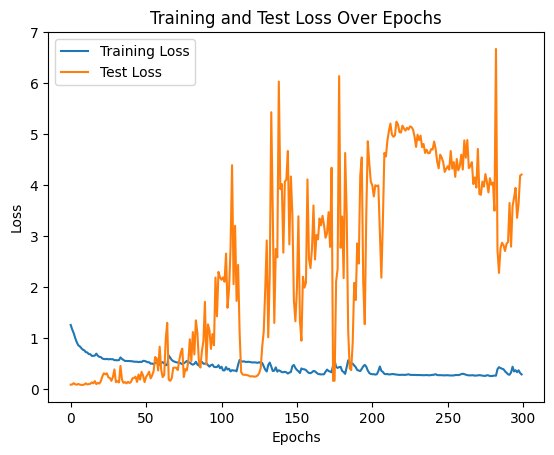

In [168]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [174]:
Multiply()([X[0],attention_weights[0]])

<KerasTensor: shape=(30, 2) dtype=float32 (created by layer 'multiply_31')>

In [172]:
X[0]

array([[-0.17182386, -0.50296342],
       [-0.13089442, -0.00182233],
       [-0.2608961 ,  0.49931875],
       [-0.16538019,  1.00045984],
       [-0.12869718,  1.50160092],
       [ 0.06688141, -1.50524558],
       [-0.0802836 , -1.0041045 ],
       [-0.31231923, -0.50296342],
       [-0.21456789, -0.00182233],
       [-0.19162092,  0.49931875],
       [-0.24723155,  1.00045984],
       [-0.18822233,  1.50160092],
       [-0.15692398, -1.50524558],
       [-0.2468531 , -1.0041045 ],
       [-0.26209458, -0.50296342],
       [-0.25157308, -0.00182233],
       [-0.32533279,  0.49931875],
       [-0.39435772,  1.00045984],
       [-0.34353306,  1.50160092],
       [-0.17652597, -1.50524558],
       [-0.24256408, -1.0041045 ],
       [-0.26504565, -0.50296342],
       [-0.25580119, -0.00182233],
       [-0.36402062,  0.49931875],
       [-0.28913967,  1.00045984],
       [-0.16921616,  1.50160092],
       [-0.19672025, -1.50524558],
       [-0.22588955, -1.0041045 ],
       [ 0.62058454,

In [167]:
attention_weights[0]

array([[0.03509471, 0.05312569],
       [0.01650608, 0.05768946],
       [0.02333919, 0.00909562],
       [0.01810642, 0.00924796],
       [0.03357736, 0.01325356],
       [0.02151995, 0.00736741],
       [0.01669738, 0.04192171],
       [0.0173602 , 0.00887843],
       [0.01375914, 0.00914033],
       [0.00931462, 0.04145986],
       [0.0207374 , 0.00335019],
       [0.02365751, 0.03402235],
       [0.07806637, 0.07246553],
       [0.01311084, 0.13919704],
       [0.03492414, 0.20573837],
       [0.02100279, 0.07772315],
       [0.01743117, 0.00716798],
       [0.01321811, 0.01406431],
       [0.04226877, 0.01099426],
       [0.01910583, 0.00358081],
       [0.02168837, 0.02519511],
       [0.01942475, 0.00118031],
       [0.02000515, 0.04041781],
       [0.02880214, 0.00877258],
       [0.09536022, 0.00623042],
       [0.03379818, 0.01538534],
       [0.02603747, 0.00208365],
       [0.08740065, 0.03254938],
       [0.05676417, 0.00584142],
       [0.12192088, 0.04285997]], dtype=flo

In [159]:
from tensorflow.keras.layers import Input, Permute, Dense, Multiply
from tensorflow.keras.models import Model

def attention_layer(inputs, time_steps):
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return a_probs, output_attention_mul

data_normalized = df[['views_std', 'weekend_std']][:-20]
data_normalized2 = df[['views_std']][:-20]

# Function to prepare the dataset for LSTM
def create_dataset(data, data2 , look_back=30, forecast_horizon=20):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data.iloc[i:(i + look_back)].values)
        y.append(data2.iloc[(i + look_back):(i + look_back + forecast_horizon)].values)
    return np.array(X), np.array(y)

# Prepare the dataset
look_back = 30
forecast_horizon = 20
X, y = create_dataset(data_normalized,data_normalized2, look_back, forecast_horizon)


# Assuming you have defined 'time_steps' and 'input_dim'
inputs = Input(shape=(look_back, 2))
attention_weights, attention_output = attention_layer(inputs, 30)

# Create a model to see the attention weights
model_for_weights = Model(inputs=[inputs], outputs=[attention_weights])

# Now, use 'model_for_weights' with actual input data to see the attention weights
# For example:
# actual_input_data = ... (your input data here)
attention_weights_values = model_for_weights.predict(X)


16/16 [==============================] - 0s 693us/step


In [161]:
attention_weights_values[0]

array([[0.02601315, 0.02040811],
       [0.03980163, 0.05122488],
       [0.04546585, 0.02101963],
       [0.01617358, 0.0726264 ],
       [0.0376024 , 0.05878838],
       [0.02890069, 0.04416529],
       [0.05100042, 0.02364992],
       [0.03877038, 0.00924097],
       [0.04089881, 0.01600864],
       [0.02457599, 0.06111685],
       [0.03234174, 0.01748072],
       [0.03993424, 0.01022366],
       [0.02978585, 0.00927143],
       [0.03624526, 0.0173887 ],
       [0.07962696, 0.00905333],
       [0.03426915, 0.01549239],
       [0.0245654 , 0.08491307],
       [0.05035425, 0.02108235],
       [0.02563672, 0.02848601],
       [0.02785661, 0.02098662],
       [0.02179658, 0.00683364],
       [0.0208764 , 0.03291973],
       [0.02214155, 0.08768896],
       [0.02370289, 0.06114078],
       [0.02607631, 0.03683818],
       [0.03280346, 0.05252148],
       [0.02552679, 0.05037379],
       [0.04487341, 0.03626613],
       [0.02215511, 0.01676643],
       [0.03022851, 0.00602356]], dtype=flo

In [144]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 30, 2)]              0         []                            
                                                                                                  
 permute_17 (Permute)        (None, 2, 30)                0         ['input_19[0][0]']            
                                                                                                  
 dense_62 (Dense)            (None, 2, 30)                930       ['permute_17[0][0]']          
                                                                                                  
 attention_vec (Permute)     (None, 30, 2)                0         ['dense_62[0][0]']            
                                                                                           

In [69]:
model.save("model.keras")

In [71]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
X.shape

(501, 30, 1)

In [16]:
y.shape

(501, 20)

using the model for inference

Using weekend model for inference

In [147]:
X_test = np.array(df[['views_std','weekend']][-50:-20])

X_test = X_test.reshape(1, look_back, 2)
#X_test = X_test.astype(np.float32)

y_pred = model.predict(X_test, batch_size=1)

1/1 [==============================] - 0s 465ms/step


In [41]:
y_pred.shape

(1, 20)

In [63]:
y_pred

array([[0.09094821, 0.14506024, 0.09242043, 0.07106359, 0.10097206,
        0.02234748, 0.12955745, 0.10094285, 0.03235268, 0.0716975 ,
        0.11033457, 0.13666996, 0.05392611, 0.07347975, 0.11210057,
        0.07013067, 0.05739408, 0.12181264, 0.07516128, 0.13785303]],
      dtype=float32)

In [43]:
df.head()

dates       views  weekend  views_std  views_mm
0 2015-07-01  20381244.0        0  -0.171824  0.125404
1 2015-07-02  20752194.0        0  -0.130894  0.132324
2 2015-07-03  19573968.0        0  -0.260896  0.110344
3 2015-07-04  20439644.0        1  -0.165380  0.126493
4 2015-07-05  20772108.0        1  -0.128697  0.132695

In [23]:
df_compare = df.tail(20).reset_index(drop=True).copy()
#df_compare['ds'] = df['dates'][-20:].copy()

In [148]:
df_compare['y_hat'] = y_pred[0]

In [112]:
df_compare.y_hat[0]

0.09094821

In [32]:
mean

21938511.076363638

In [149]:
#denormalise the predictions
df_compare['views_pred'] = df_compare['y_hat']*std + mean

In [34]:
df_compare.head()

dates       views  weekend  views_std  views_mm     y_hat  views_pred
0 2016-12-12  24765200.0        0   0.311888  0.207186  0.275486  24435288.0
1 2016-12-13  23661288.0        0   0.190086  0.186592  0.244293  24152582.0
2 2016-12-14  22659908.0        0   0.079597  0.167912  0.135044  23162436.0
3 2016-12-15  20834184.0        0  -0.121848  0.133853  0.100845  22852484.0
4 2016-12-16  19653624.0        0  -0.252107  0.111830  0.121228  23037218.0

In [150]:
df_compare['error'] = (df_compare['views']-df_compare['views_pred'])*100/df_compare['views']

In [27]:
df_compare['mean'] = mean

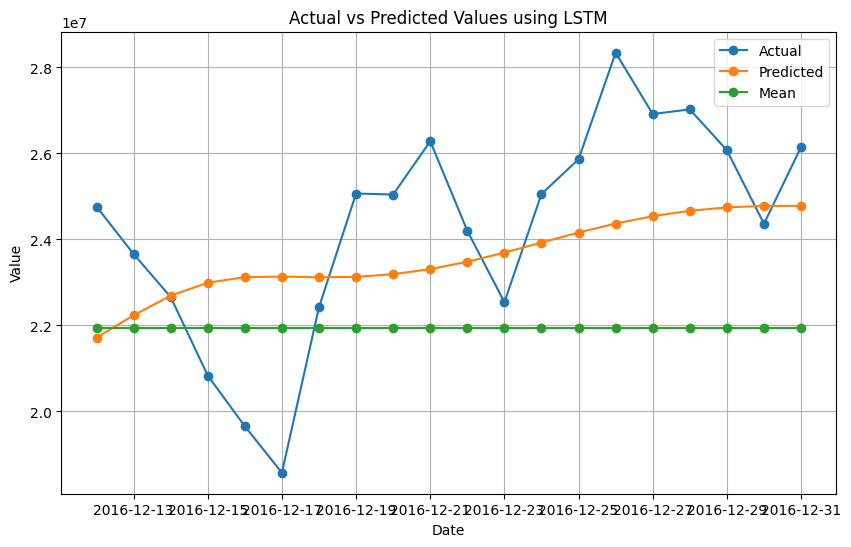

In [116]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using LSTM')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [117]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 5110542277820.4
Error percent at 1st step: 12.313908226059148 %
Error percent at 20th step: 5.236176238664236 %
Max error is 24.565930047448237 %


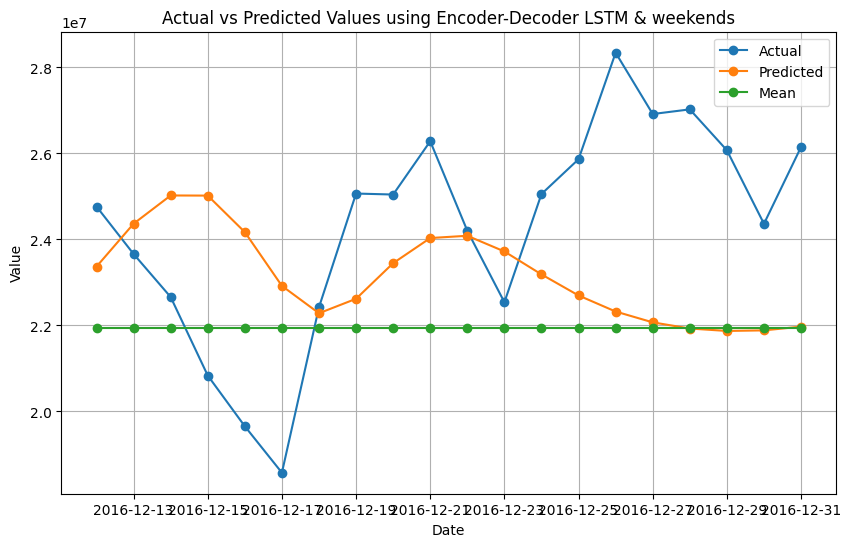

In [151]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(df_compare['views'], df_compare['views_pred'])
#print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred'] , label='Predicted', marker='o')
ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')

# Customize the plot
ax.set_title('Actual vs Predicted Values using Encoder-Decoder LSTM & weekends')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()

In [152]:
print(f'Mean Squared Error: {mse}')
print('Error percent at 1st step:',df_compare['error'][0],'%')
print('Error percent at 20th step:',df_compare['error'][19],'%')
print('Max error is',max(abs(df_compare['error'])),'%')

Mean Squared Error: 11019184424797.6
Error percent at 1st step: 5.643443218710125 %
Error percent at 20th step: 15.977428283633287 %
Max error is 23.39657611186344 %


In [96]:
df_compare.head()

dates       views  weekend  views_std  views_mm  weekend_std   y_hat_1   
0 2016-12-12  24765200.0        0   0.311888  0.207186    -1.505246  0.181946  \
1 2016-12-13  23661288.0        1   0.190086  0.186592    -1.004105  0.137130   
2 2016-12-14  22659908.0        2   0.079597  0.167912    -0.502963  0.037381   
3 2016-12-15  20834184.0        3  -0.121848  0.133853    -0.001822 -0.039738   
4 2016-12-16  19653624.0        4  -0.252107  0.111830     0.499319 -0.073948   

   views_pred_enc_dec       error          mean   y_hat_3   
0          23587520.0    4.513269  2.193851e+07  0.188562  \
1          23181338.0   -4.049467  2.193851e+07  0.295805   
2          22277298.0  -21.929339  2.193851e+07  0.627878   
3          21578364.0  -63.052337  2.193851e+07  1.327585   
4          21268308.0 -106.905719  2.193851e+07  2.066163   

   views_pred_attn_multi  
0             23647480.0  
1             24619444.0  
2             27629076.0  
3             33970624.0  
4             40664472.0

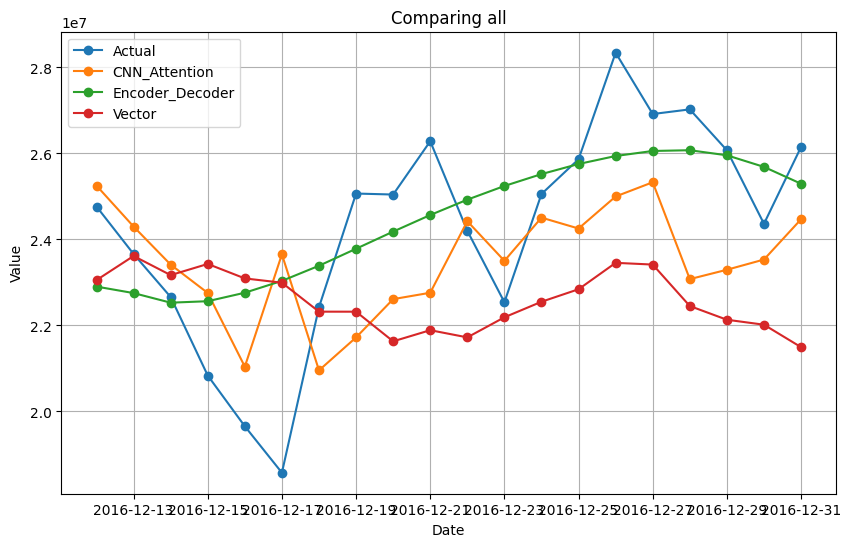

In [234]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_compare['dates'],df_compare['views'] , label='Actual', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_attn'] , label='CNN_Attention', marker='o')
#ax.plot(df_compare['dates'],df_compare['mean'] , label='Mean', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_enc_dec'] , label='Encoder_Decoder', marker='o')
ax.plot(df_compare['dates'],df_compare['views_pred_simple_vector'] , label='Vector', marker='o')


# Customize the plot
ax.set_title('Comparing all')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
plt.show()